In [40]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%pylab inline
import matplotlib.mlab as mlab
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [2]:
master = pd.read_csv('Data/master_updated.csv')
master = master.drop('Unnamed: 0',axis=1)

In [3]:
master.head(2)

,District,Foreigner,Hill Brahman,Hill Chhetree,Hill Dalit,Madhesi Brahman/Chhetree,Madhesi Dalit,Madhesi Other - OC A,Madhesi Other - OC B,Mtn/Hill Janajati A,...,Tetanus,Tuberculosis,Whooping cough,Alcoholism,Anxiety (Neurosis,Conversive disorder (Hysteria),Depression,Epilesy,Mental retardation,Psychosis
0,Achham,0.0,0.102036,0.581749,0.135158,0.000101,0.000000,0.004921,0.0,0.006921,...,0.0,0.000241,0.000062,0.000035,0.001208,0.000151,0.001480,0.000419,0.000019,0.000140
1,Arghakhanchi,0.0,0.327665,0.193248,0.209020,0.001604,0.000066,0.001058,0.0,0.193349,...,0.0,0.000238,0.000000,0.000283,0.001933,0.000162,0.001351,0.000101,0.000035,0.000334


In [4]:
cols = master.columns.tolist()
print(cols)

['District', 'Foreigner', 'Hill Brahman', 'Hill Chhetree', 'Hill Dalit', 'Madhesi Brahman/Chhetree', 'Madhesi Dalit', 'Madhesi Other - OC A', 'Madhesi Other - OC B', 'Mtn/Hill Janajati A', 'Mtn/Hill Janajati B', 'Musalman', 'Newar', 'Other (MPB)', 'Other undefined', 'Tarai Janajati', 'Total Pop Census', 'Poverty Gap', 'Poverty Incidence', 'Poverty Severity', 'Adult illiteracy rate', 'Deprivation in economic provisioning', 'HPI', 'People not expected to survive age 40', 'Children <5 years malnourished', 'Without safe water', 'BCG3', 'DPT-HepB 1 3', 'DPT-HepB 2 3', 'DPT-HepB 3 3', 'Japenese Encephalitis 3', 'Measles 12-23 3', 'Measles 9-11 months 3', 'Polio13', 'Polio23', 'Polio33', 'TT 1 3', 'TT 2+ 3', 'TT23', 'Sanitation Coverage (%', 'Water Coverage Supply (%)', 'HDI ', 'Sex Ratio (male per 100 female)', 'Confirmed Meningitis 3', 'HIV/AIDS3', 'Leprosy3', 'STD/STI3', 'Acute Flacid Paralysis', 'Chicken pox', 'Diptheria', 'Hepatatis-B', 'Measles', 'Mumps', 'Neonatal Tetanus', 'Rubella', 

### pick disease to predict and drop other diseases

In [5]:
disease = master.iloc[:,43:]

In [6]:
disease.mean()

Confirmed Meningitis 3             0.000056
HIV/AIDS3                          0.000138
Leprosy3                           0.000072
STD/STI3                           0.001661
Acute Flacid Paralysis             0.000017
Chicken pox                        0.000651
Diptheria                          0.000006
Hepatatis-B                        0.000039
Measles                            0.000144
Mumps                              0.001655
Neonatal Tetanus                   0.000002
Rubella                            0.000033
Tetanus                            0.000012
Tuberculosis                       0.000560
Whooping cough                     0.000063
Alcoholism                         0.000356
Anxiety (Neurosis                  0.001212
Conversive disorder\n(Hysteria)    0.000196
Depression                         0.000974
Epilesy                            0.000401
Mental retardation                 0.000115
Psychosis                          0.000239
dtype: float64

#### choosing STD/STI3 because it has highest average prevalence

In [7]:
x = master.iloc[:,:43]
y = master['STD/STI3']

/Users/kristikorsberg/devel/venv/lib/python2.7/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


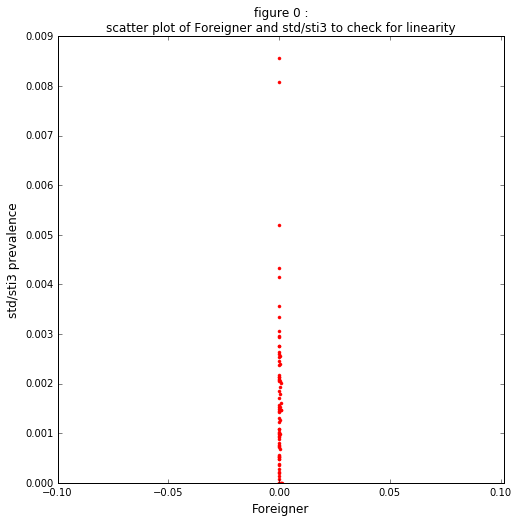

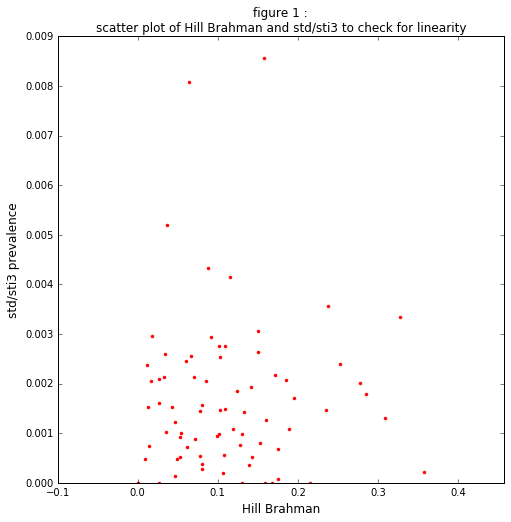

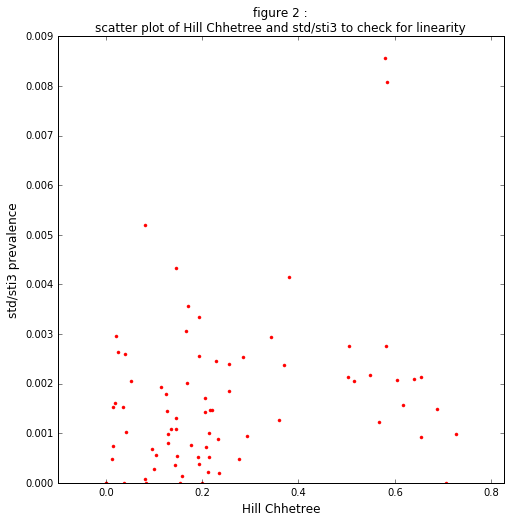

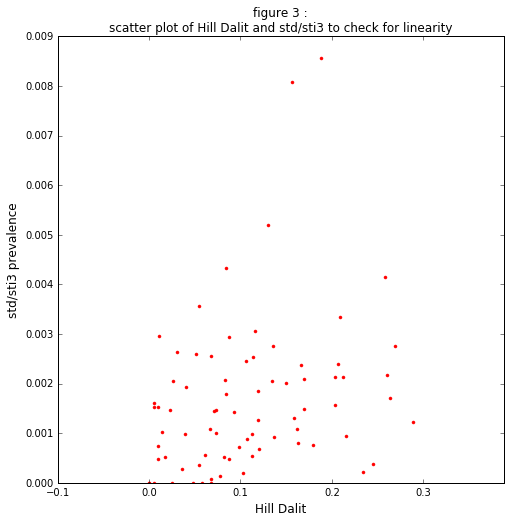

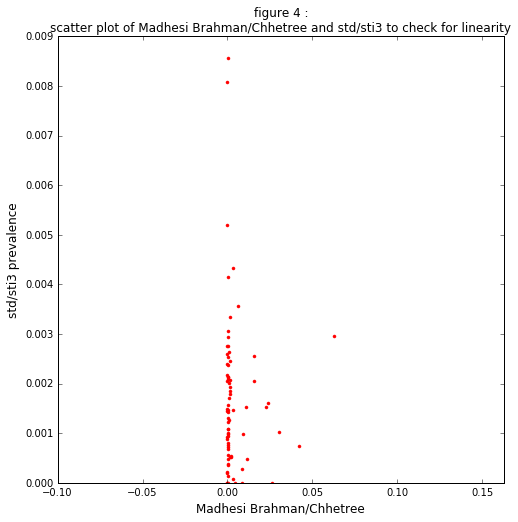

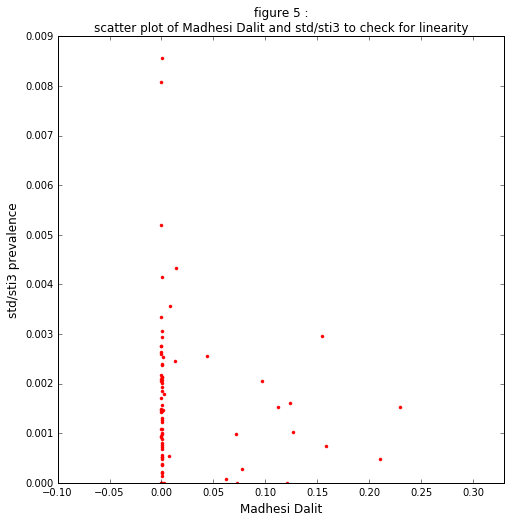

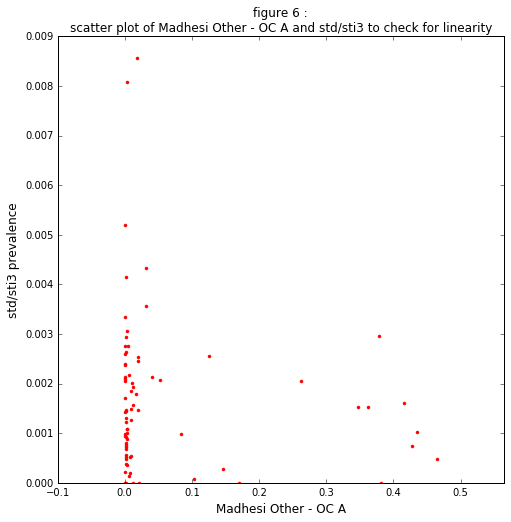

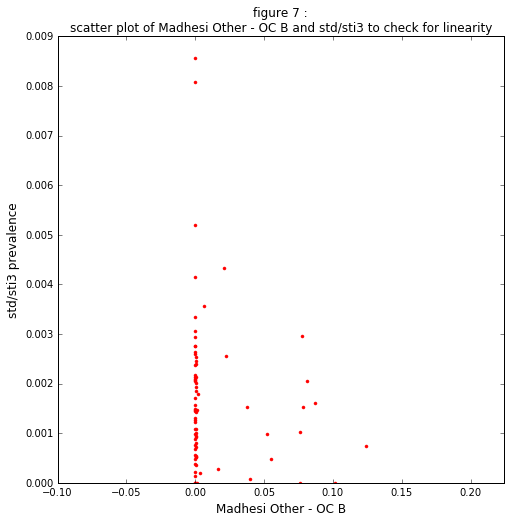

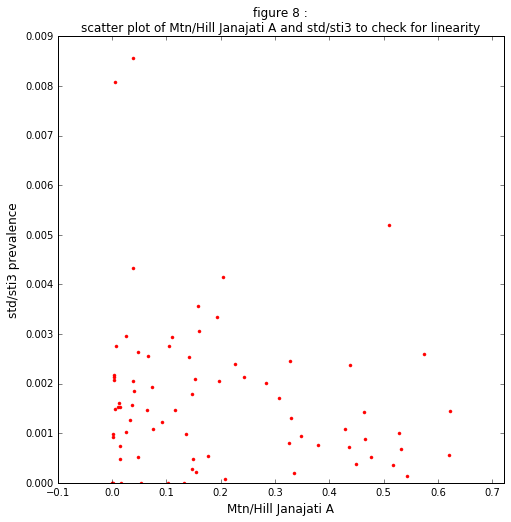

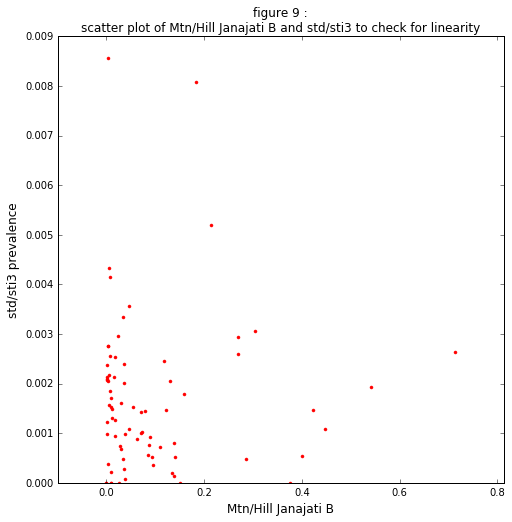

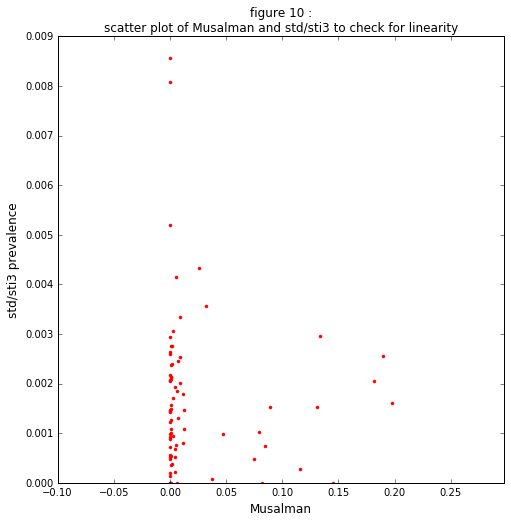

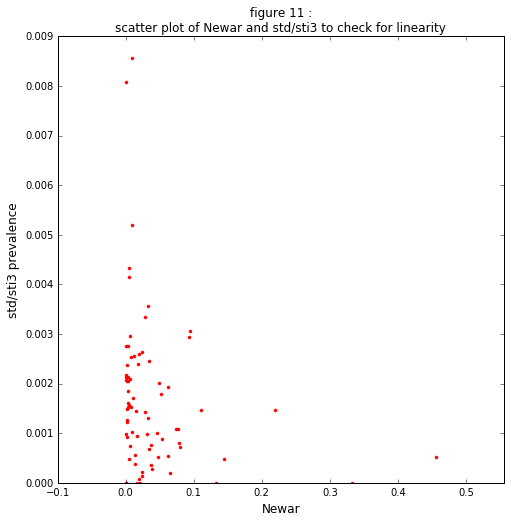

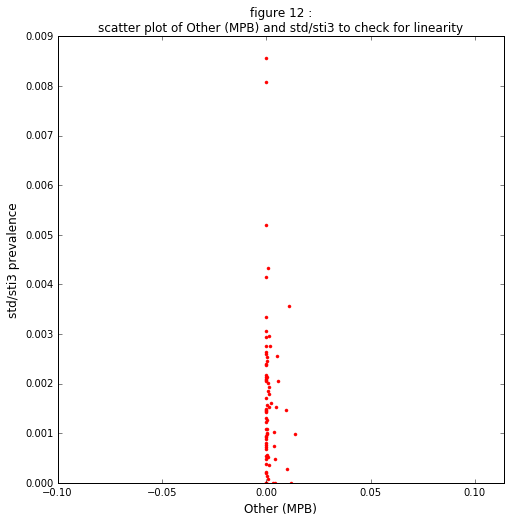

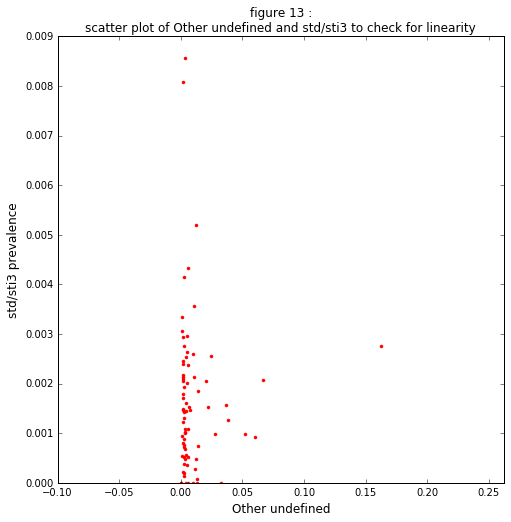

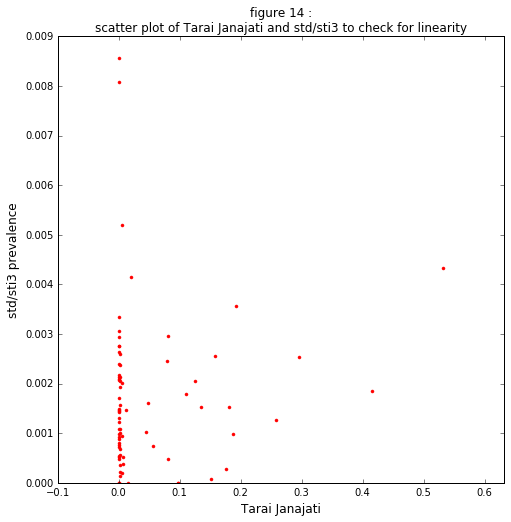

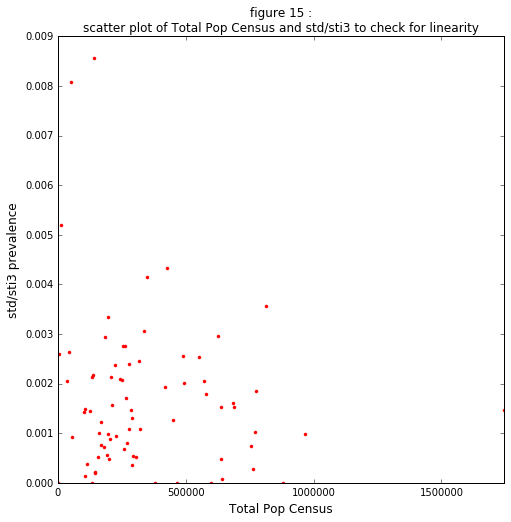

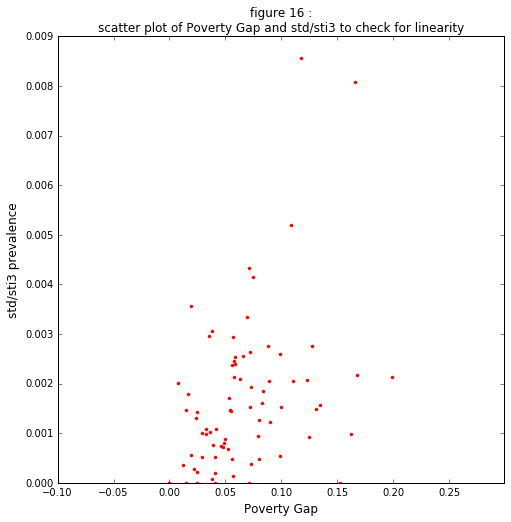

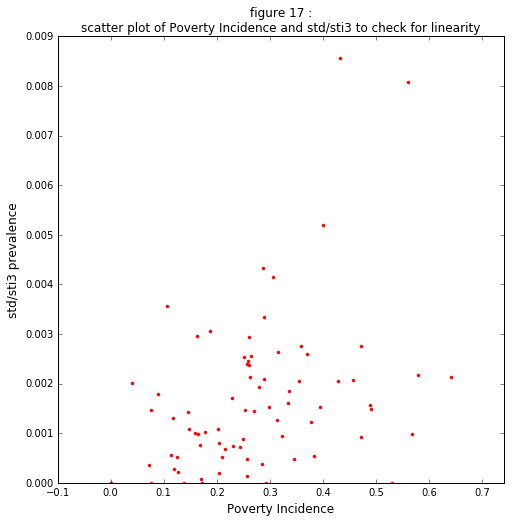

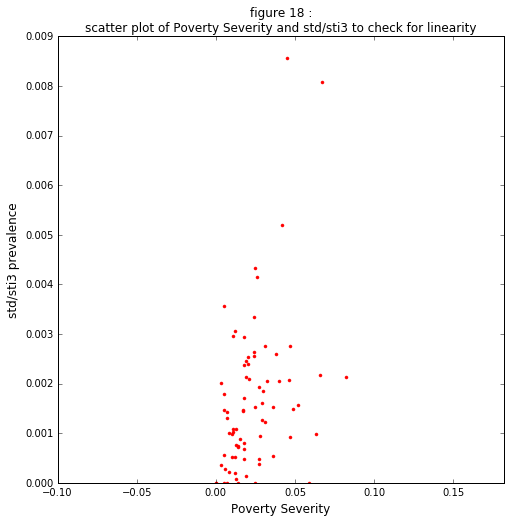

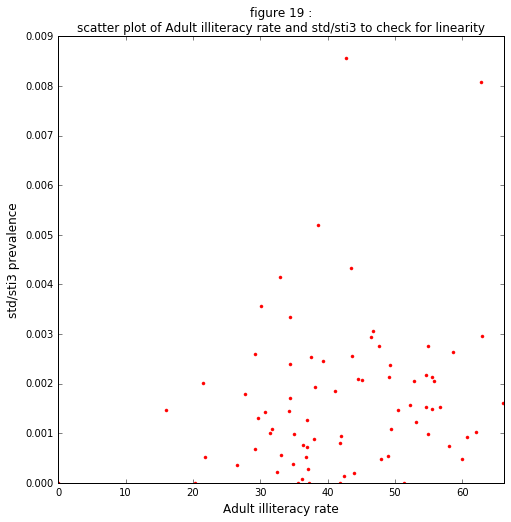

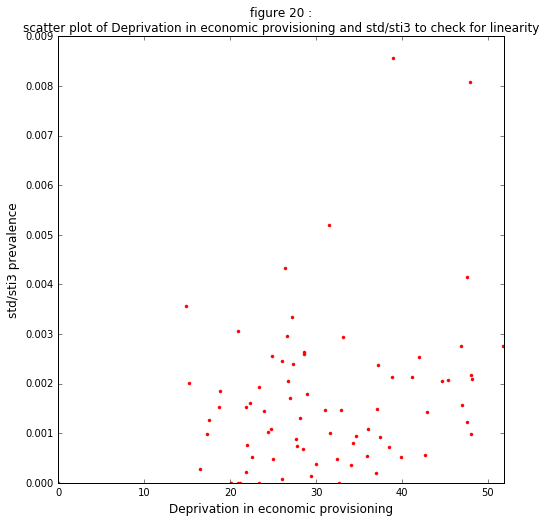

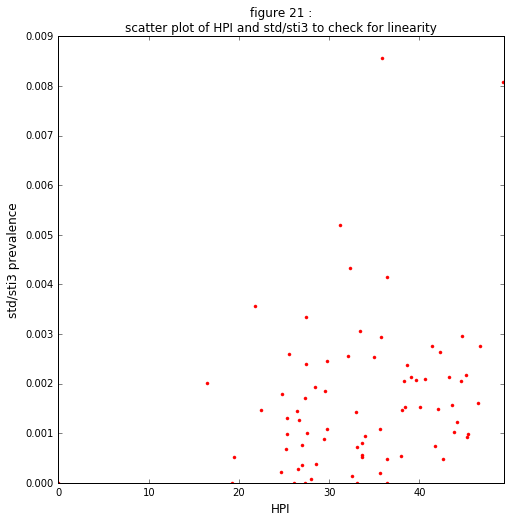

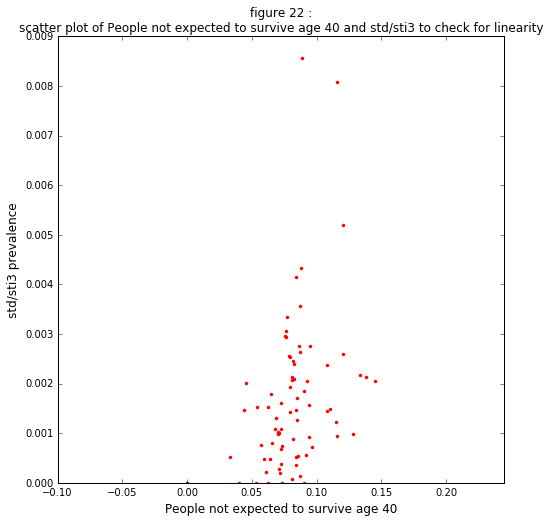

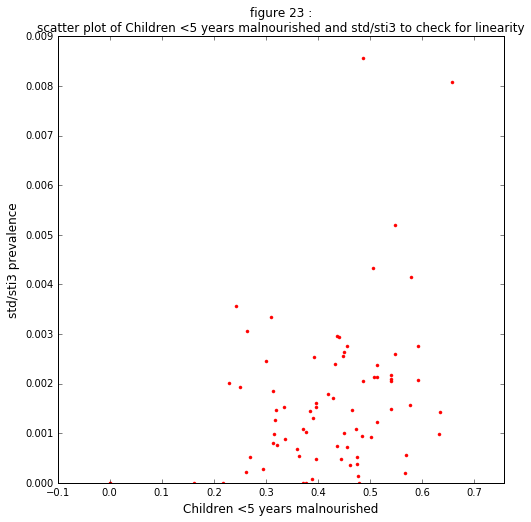

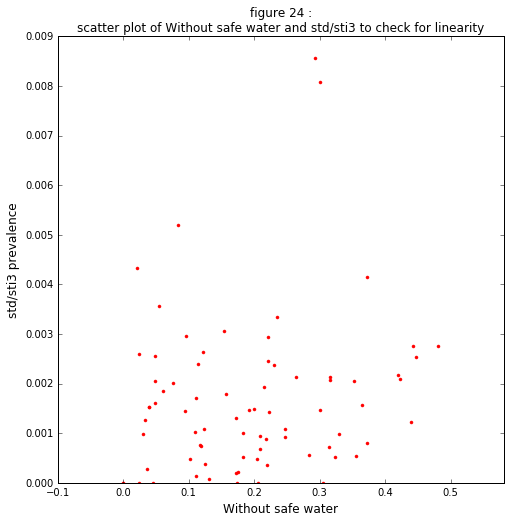

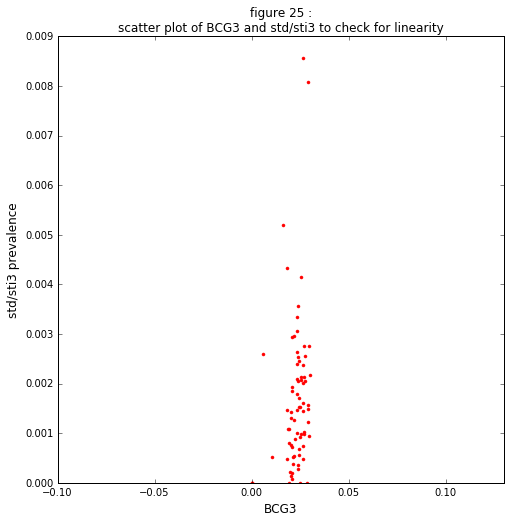

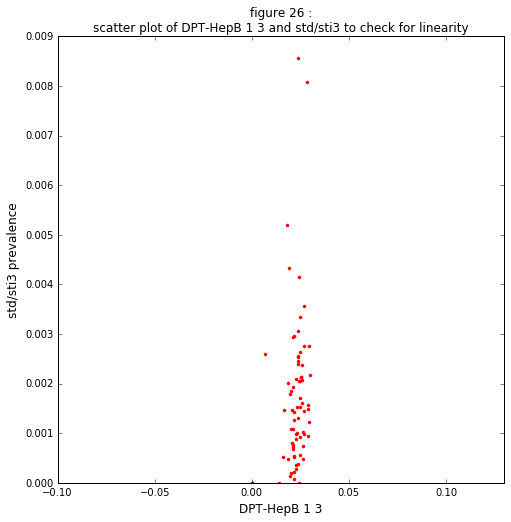

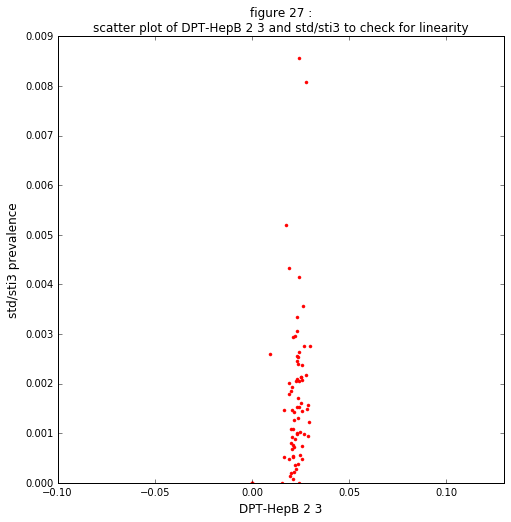

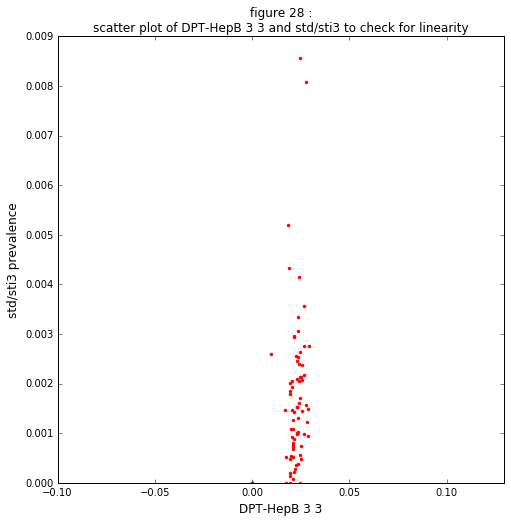

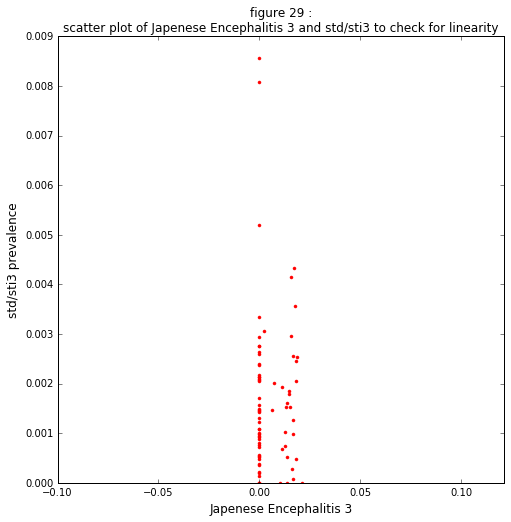

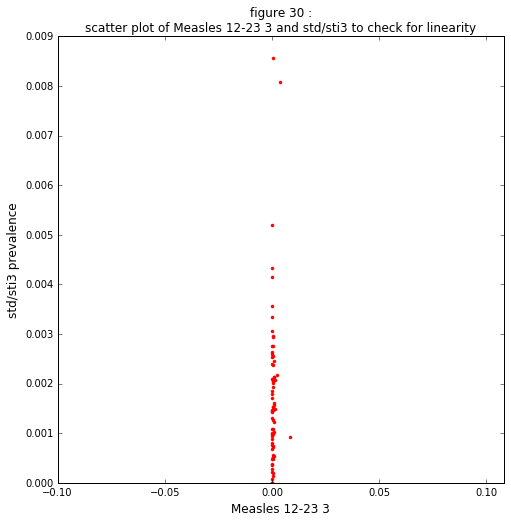

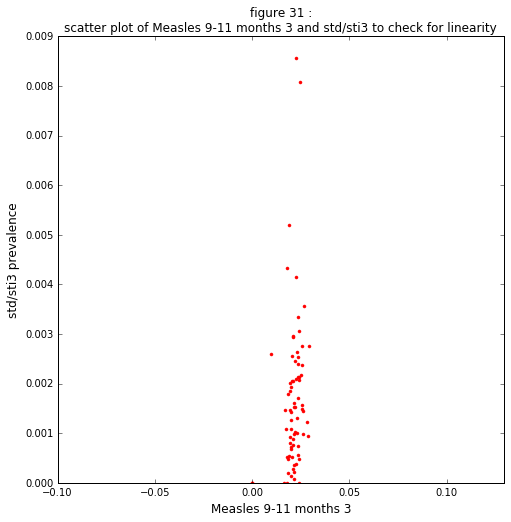

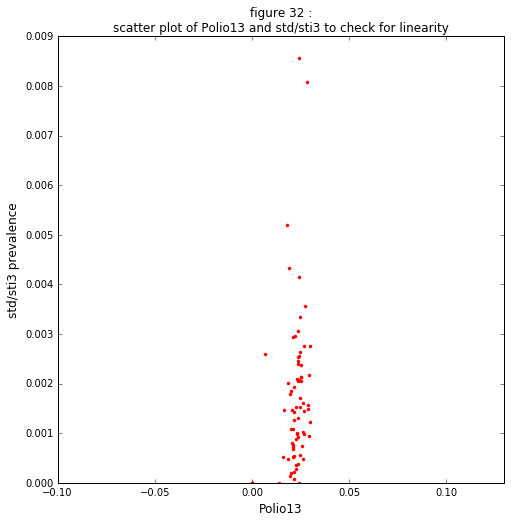

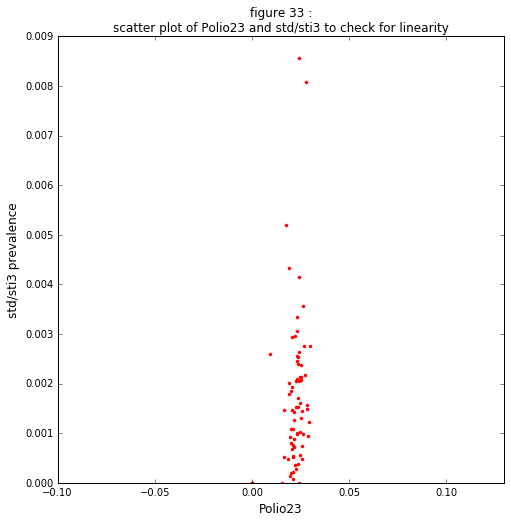

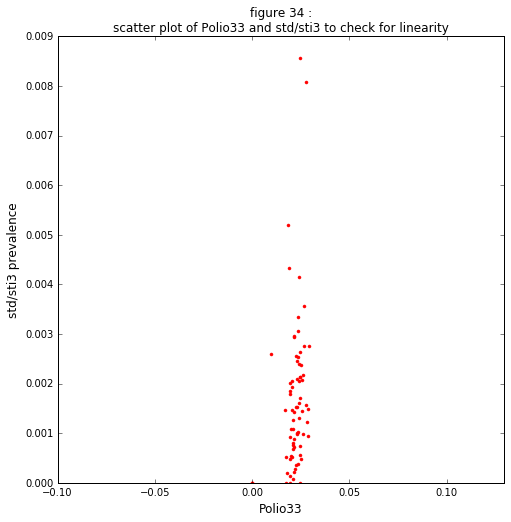

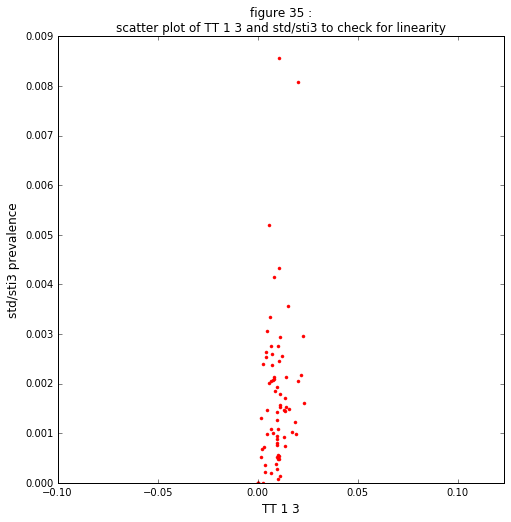

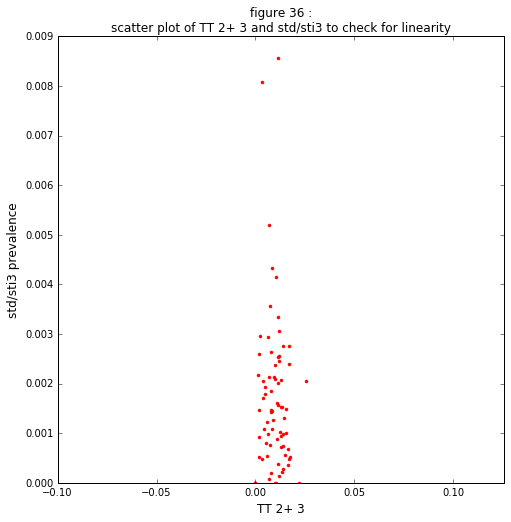

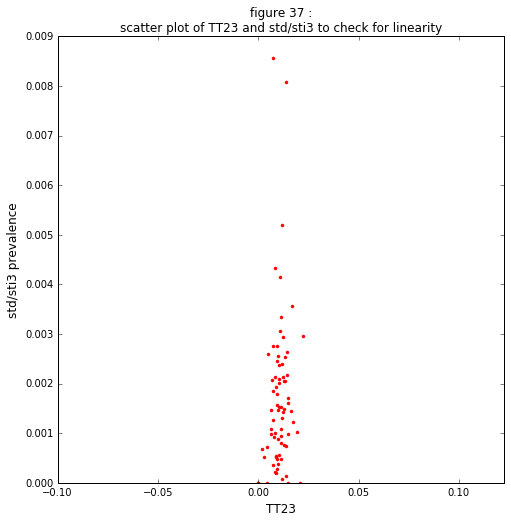

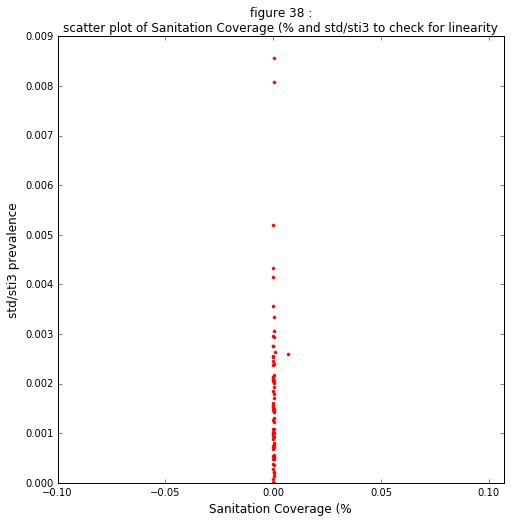

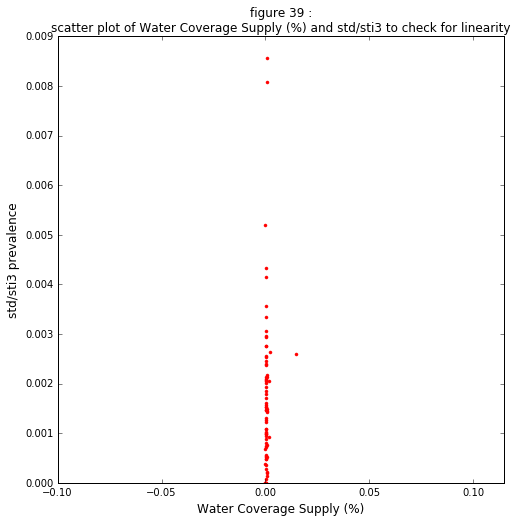

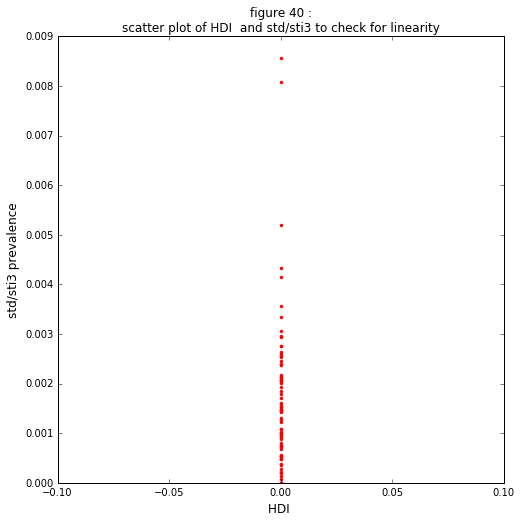

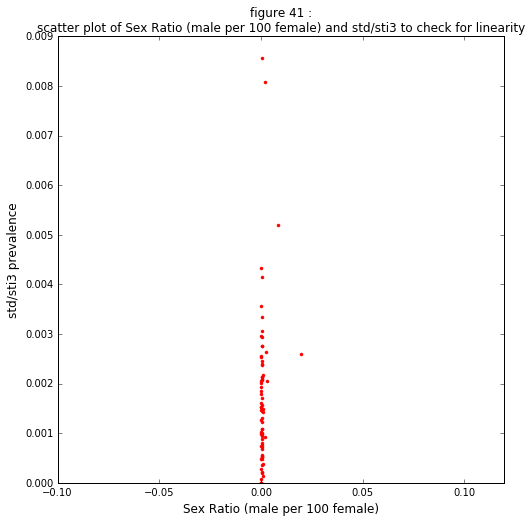

In [8]:
for i, elem in enumerate(x.iloc[:,1:]):
    plt.figure(figsize=(8,8))
    plt.plot(x[elem], y, 'r.')
    plt.title('figure ' + str(i) +  ' :\nscatter plot of ' + elem + ' and std/sti3 to check for linearity', fontsize=12)
    plt.xlabel(elem, fontsize=12)
    plt.xlim((min(x[elem])-.1),(max(x[elem])+.1))
    plt.ylabel('std/sti3 prevalence', fontsize=12)

In [9]:
dfs = [x,y]
sti = pd.concat(dfs,axis=1)
sti = sti.rename(columns={'TT 2+ 3':'TT2plus3', 'STD/STI3':'STD'})
sti.head(2)

,District,Foreigner,Hill Brahman,Hill Chhetree,Hill Dalit,Madhesi Brahman/Chhetree,Madhesi Dalit,Madhesi Other - OC A,Madhesi Other - OC B,Mtn/Hill Janajati A,...,Polio23,Polio33,TT 1 3,TT2plus3,TT23,Sanitation Coverage (%,Water Coverage Supply (%),HDI,Sex Ratio (male per 100 female),STD
0,Achham,0.0,0.102036,0.581749,0.135158,0.000101,0.000000,0.004921,0.0,0.006921,...,0.029579,0.029443,0.006622,0.016988,0.007410,0.000074,0.000342,0.000001,0.000338,0.002750
1,Arghakhanchi,0.0,0.327665,0.193248,0.209020,0.001604,0.000066,0.001058,0.0,0.193349,...,0.023377,0.023797,0.006097,0.011162,0.011481,0.000234,0.000420,0.000002,0.000390,0.003334


In [10]:
sti.rename(columns=lambda x: x.replace(' ',''), inplace=True)
sti.rename(columns=lambda x: x.replace('/',''), inplace=True)
sti.rename(columns=lambda x: x.replace('(',''), inplace=True)
sti.rename(columns=lambda x: x.replace(')',''), inplace=True)
sti.rename(columns=lambda x: x.replace('-',''), inplace=True)
sti.rename(columns=lambda x: x.replace('%',''), inplace=True)
sti.rename(columns=lambda x: x.replace('+',''), inplace=True)
sti.rename(columns=lambda x: x.replace('<',''), inplace=True)

In [11]:
sti.head()

,District,Foreigner,HillBrahman,HillChhetree,HillDalit,MadhesiBrahmanChhetree,MadhesiDalit,MadhesiOtherOCA,MadhesiOtherOCB,MtnHillJanajatiA,...,Polio23,Polio33,TT13,TT2plus3,TT23,SanitationCoverage,WaterCoverageSupply,HDI,SexRatiomaleper100female,STD
0,Achham,0.000000,0.102036,0.581749,0.135158,0.000101,0.000000,0.004921,0.0,0.006921,...,0.029579,0.029443,0.006622,0.016988,0.007410,0.000074,0.000342,0.000001,0.000338,0.002750
1,Arghakhanchi,0.000000,0.327665,0.193248,0.209020,0.001604,0.000066,0.001058,0.0,0.193349,...,0.023377,0.023797,0.006097,0.011162,0.011481,0.000234,0.000420,0.000002,0.000390,0.003334
2,Baglung,0.000045,0.195385,0.205601,0.263230,0.001165,0.000000,0.000927,0.0,0.308176,...,0.023718,0.024362,0.013748,0.003846,0.014728,0.000221,0.000338,0.000002,0.000290,0.001709
3,Baitadi,0.000052,0.185498,0.603899,0.083153,0.001610,0.000128,0.052499,0.0,0.003870,...,0.025277,0.025576,0.007421,0.012945,0.006983,0.000102,0.000357,0.000002,0.000351,0.002065
4,Bajhang,0.000077,0.101953,0.726490,0.113103,0.000497,0.000102,0.000277,0.0,0.002055,...,0.026225,0.026261,0.019287,0.006267,0.015019,0.000072,0.000298,0.000002,0.000466,0.000989


In [12]:
sti[u'JapeneseEncephalitis3'].unique()

array([ 0.        ,  0.01679988,  0.01335305,  0.01699814,  0.01388802,
        0.01472627,  0.01877365,  0.00230014,  0.01262625,  0.01764105,
        0.01496309,  0.01665603,  0.01826603,  0.00723027,  0.00609721,
        0.01045004,  0.01566015,  0.01118016,  0.01681013,  0.01684672,
        0.01106134,  0.01385651,  0.01354842,  0.02133161,  0.01501211,
        0.01284218,  0.01810528,  0.01605659,  0.01588351,  0.0183887 ])

In [13]:
sti.columns

Index([u'District', u'Foreigner', u'HillBrahman', u'HillChhetree',
       u'HillDalit', u'MadhesiBrahmanChhetree', u'MadhesiDalit',
       u'MadhesiOtherOCA', u'MadhesiOtherOCB', u'MtnHillJanajatiA',
       u'MtnHillJanajatiB', u'Musalman', u'Newar', u'OtherMPB',
       u'Otherundefined', u'TaraiJanajati', u'TotalPopCensus', u'PovertyGap',
       u'PovertyIncidence', u'PovertySeverity', u'Adultilliteracyrate',
       u'Deprivationineconomicprovisioning', u'HPI',
       u'Peoplenotexpectedtosurviveage40', u'Children5yearsmalnourished',
       u'Withoutsafewater', u'BCG3', u'DPTHepB13', u'DPTHepB23', u'DPTHepB33',
       u'JapeneseEncephalitis3', u'Measles12233', u'Measles911months3',
       u'Polio13', u'Polio23', u'Polio33', u'TT13', u'TT2plus3', u'TT23',
       u'SanitationCoverage', u'WaterCoverageSupply', u'HDI',
       u'SexRatiomaleper100female', u'STD'],
      dtype='object')

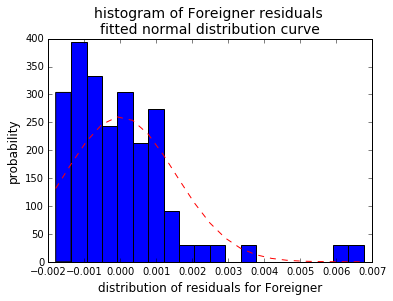

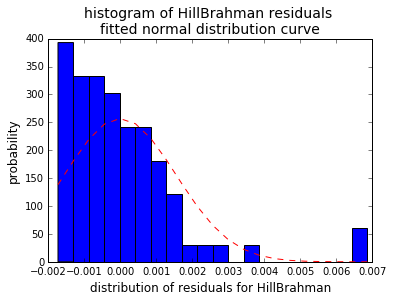

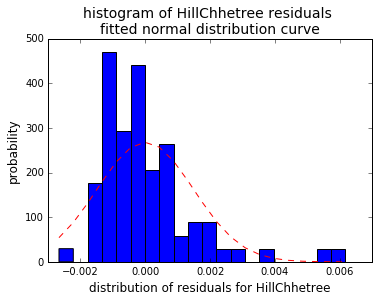

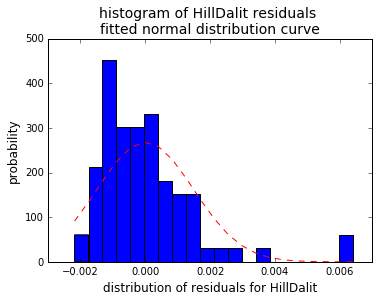

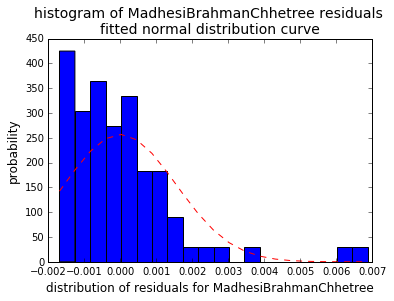

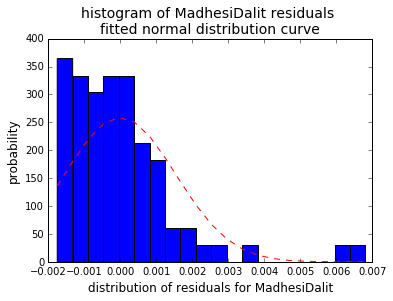

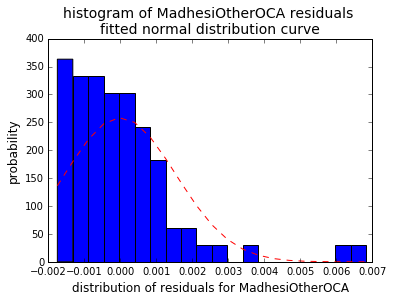

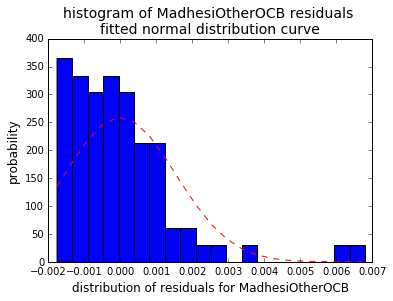

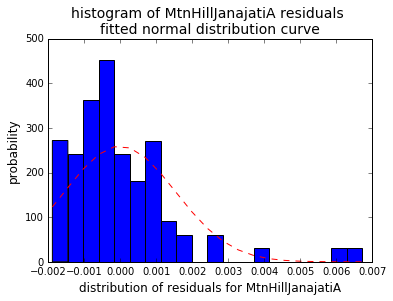

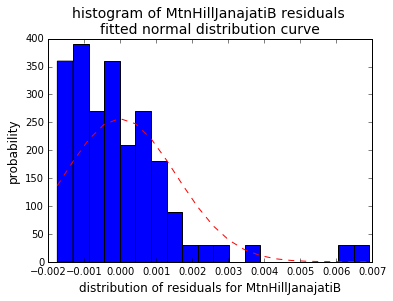

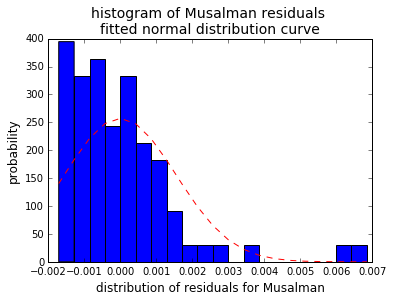

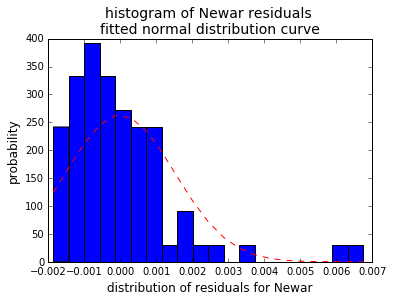

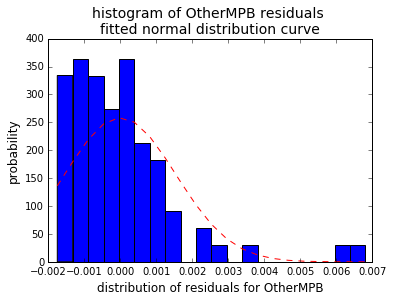

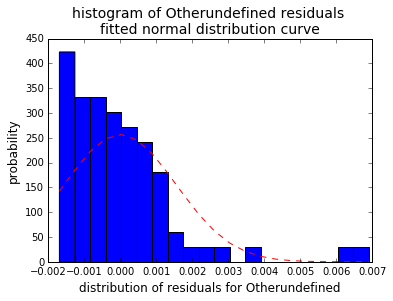

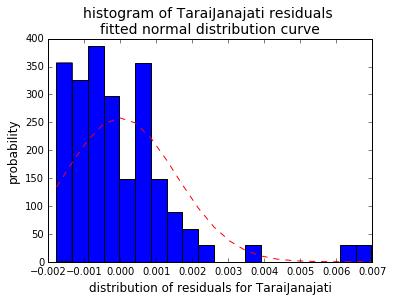

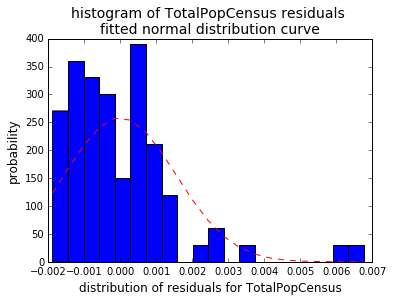

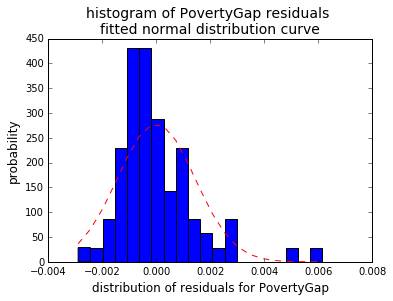

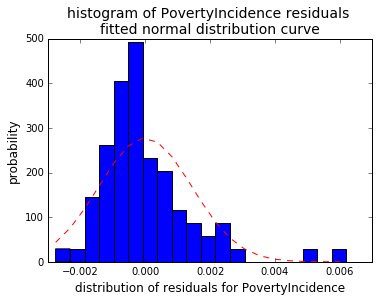

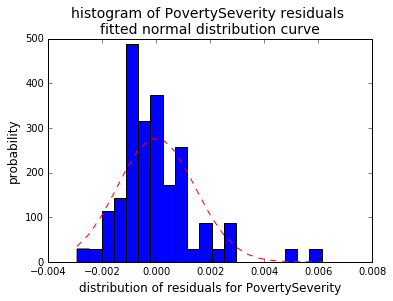

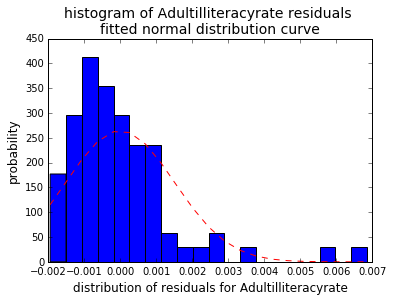

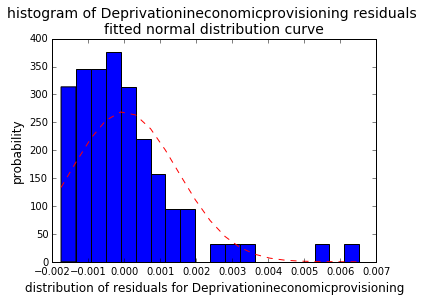

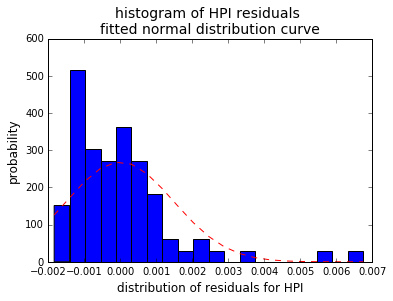

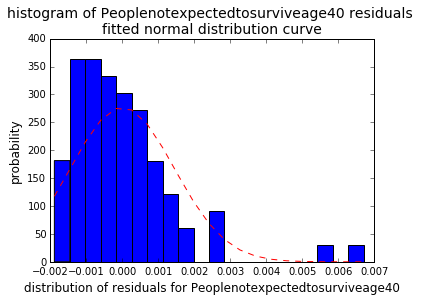

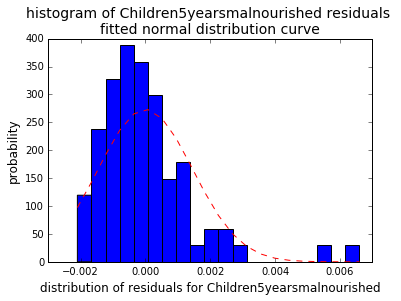

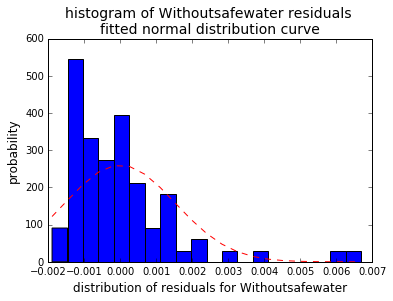

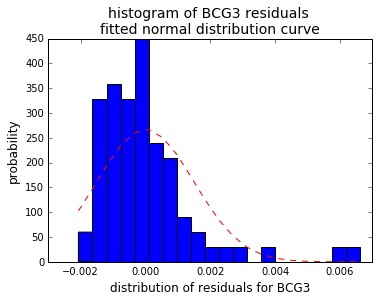

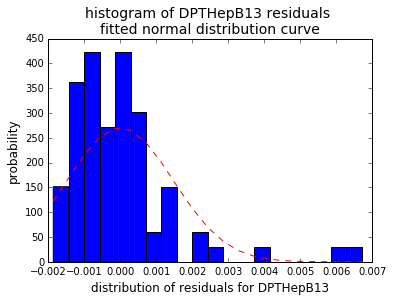

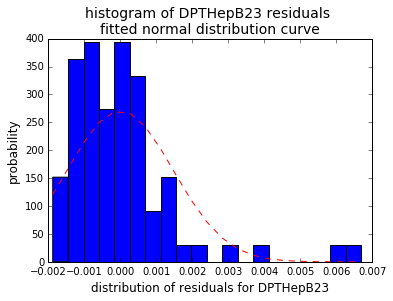

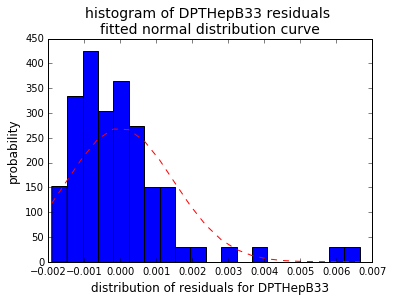

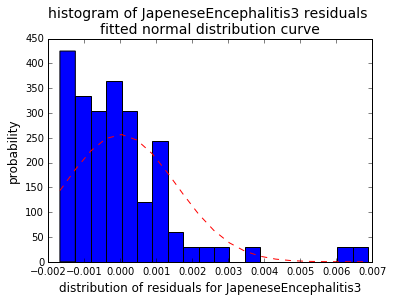

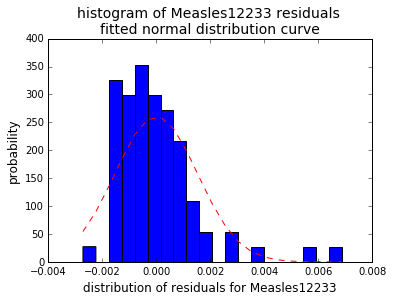

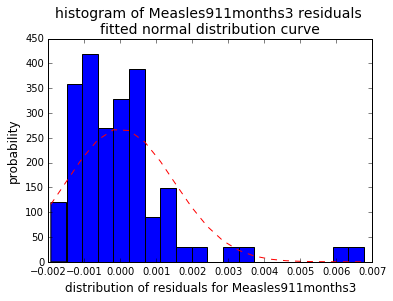

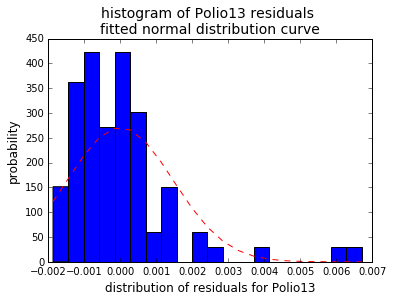

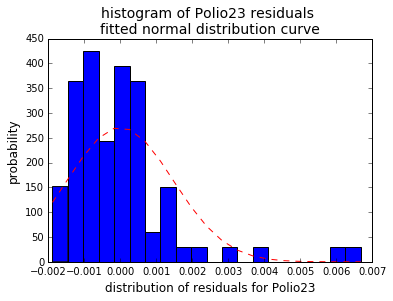

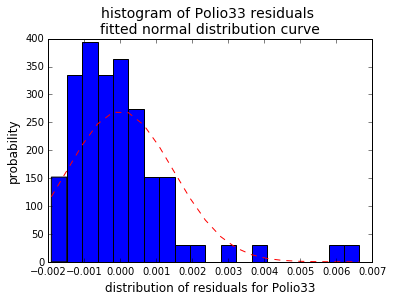

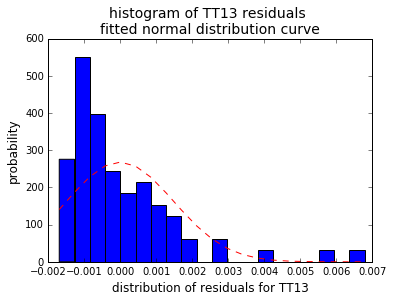

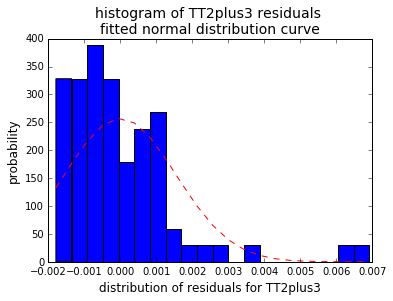

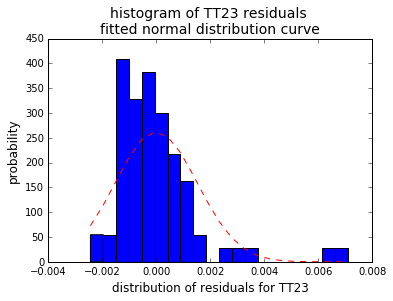

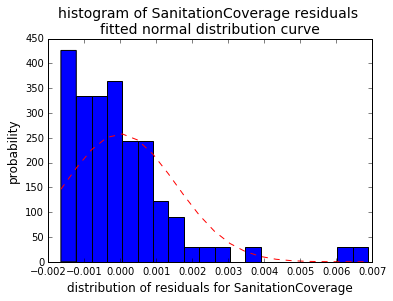

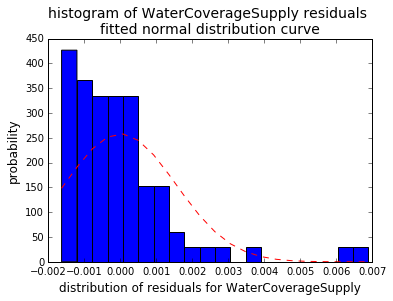

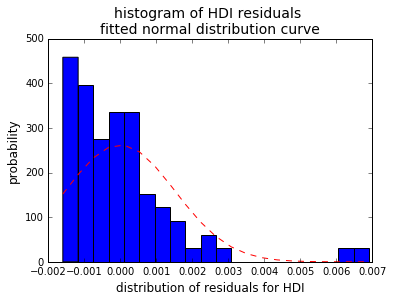

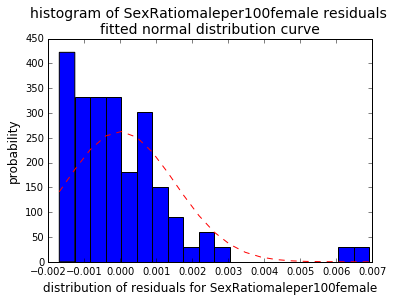

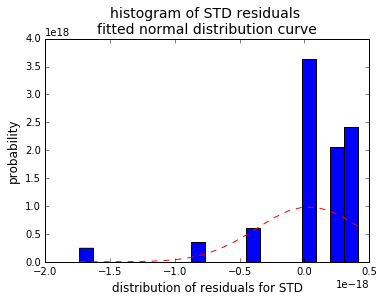

In [14]:
for i, elem in enumerate(sti.columns[1:]):
    results = sm.OLS(sti['STD'], sm.add_constant(sti[elem])).fit()
    residuals = sorted(results.resid) # just in case it isn't sorted

    mu = np.mean(residuals) # mean of distribution
    sigma = np.std(residuals) # standard deviation of distribution

    num_bins = 20
    # the histogram of the data
    n, bins, patches = plt.hist(residuals, num_bins, normed=1, facecolor='blue')

    # add a 'normal best fit' line
    y = mlab.normpdf(bins, mu, sigma)
    plt.plot(bins, y, 'r--')
    plt.xlabel('distribution of residuals for ' + elem, fontsize=12)
    plt.ylabel('probability', fontsize=12)
    plt.title('histogram of ' + elem + ' residuals \nfitted normal distribution curve', fontsize=14)

    # tweak spacing to prevent clipping of ylabel
    plt.subplots_adjust(left=0.15)
    plt.show()

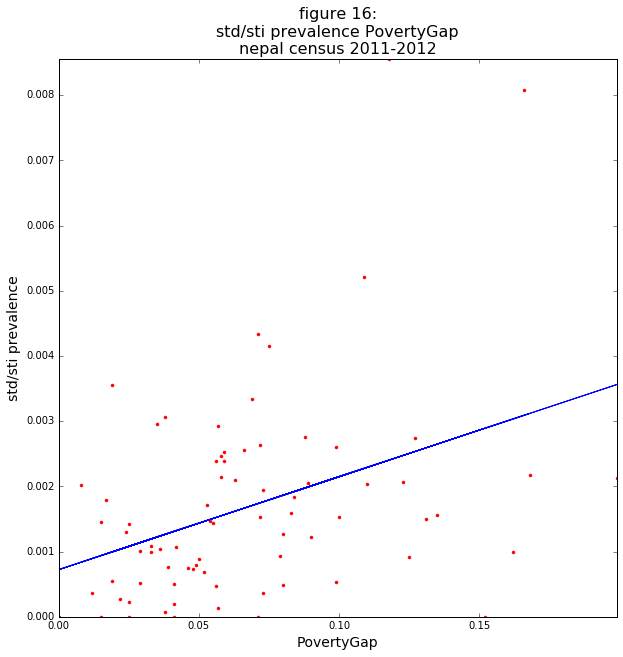

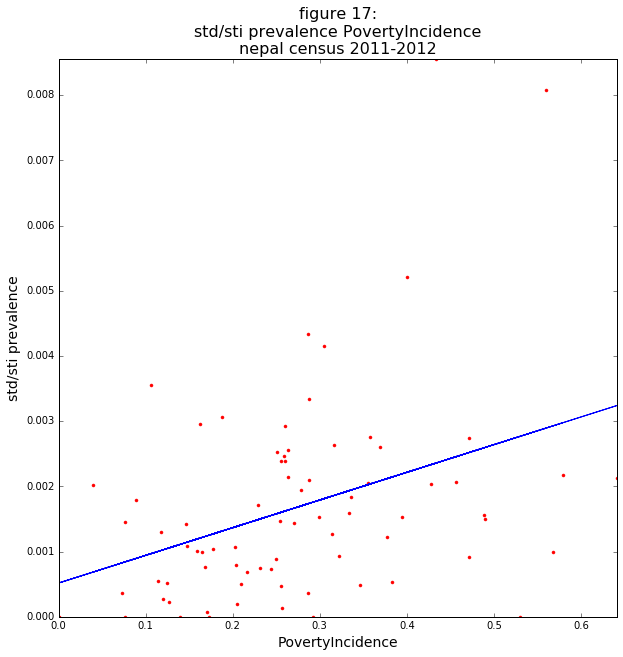

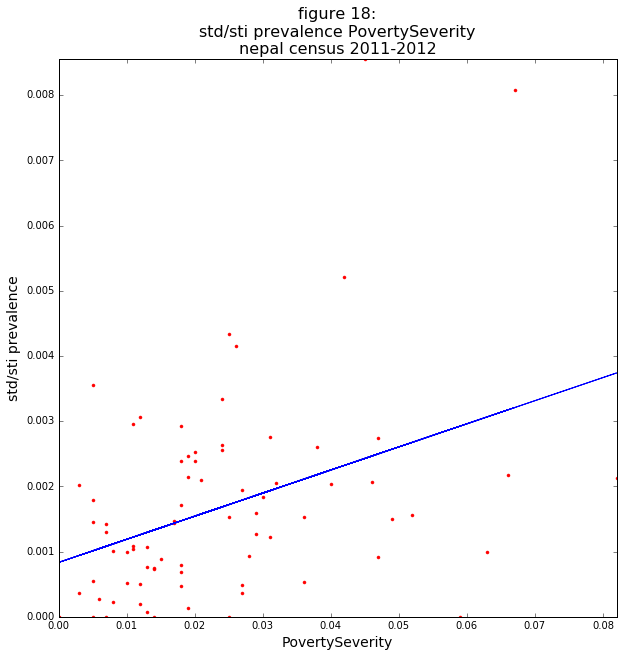

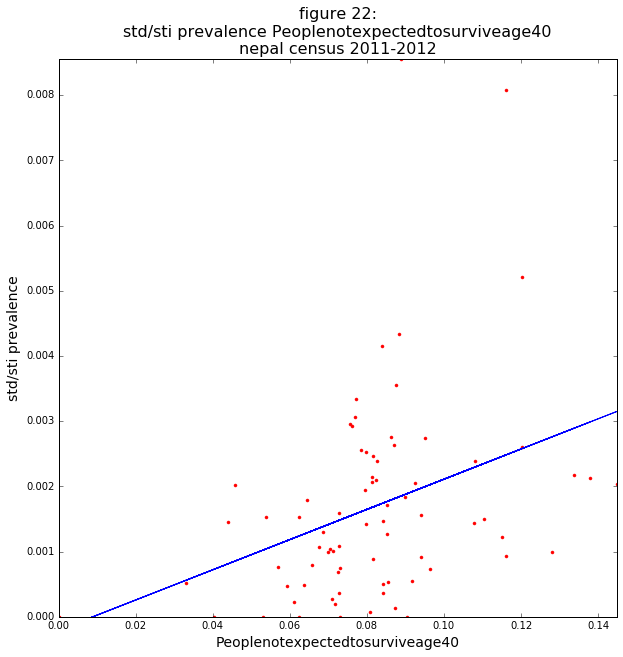

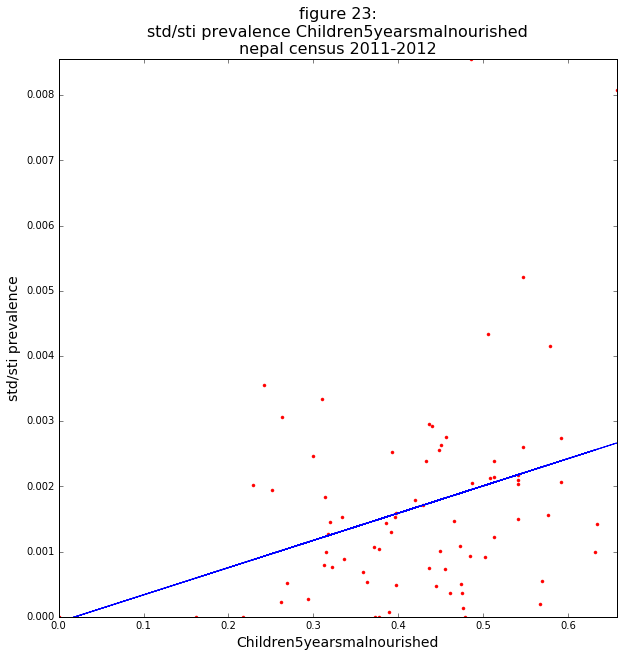

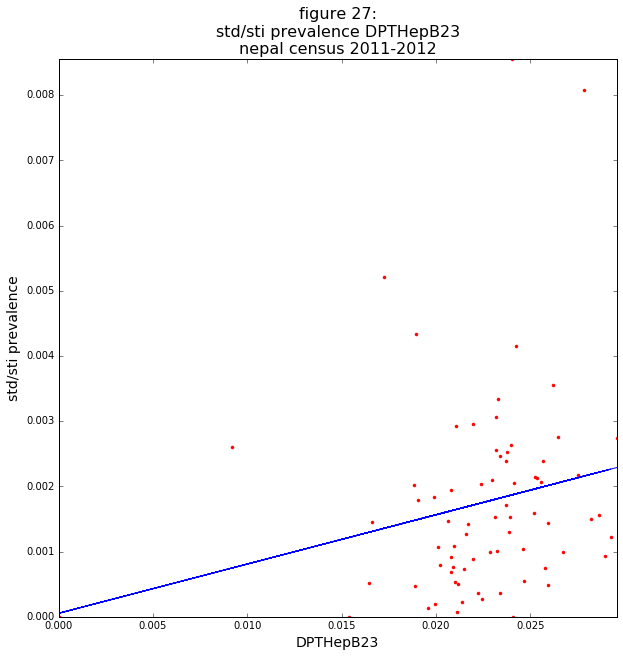

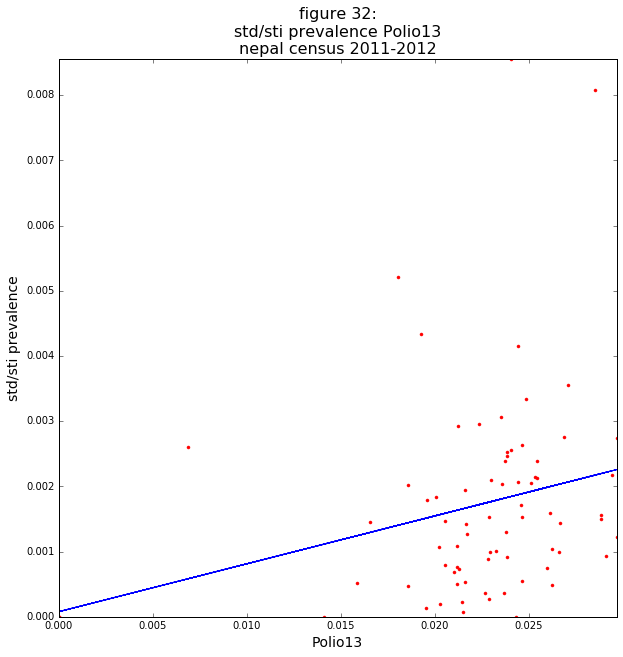

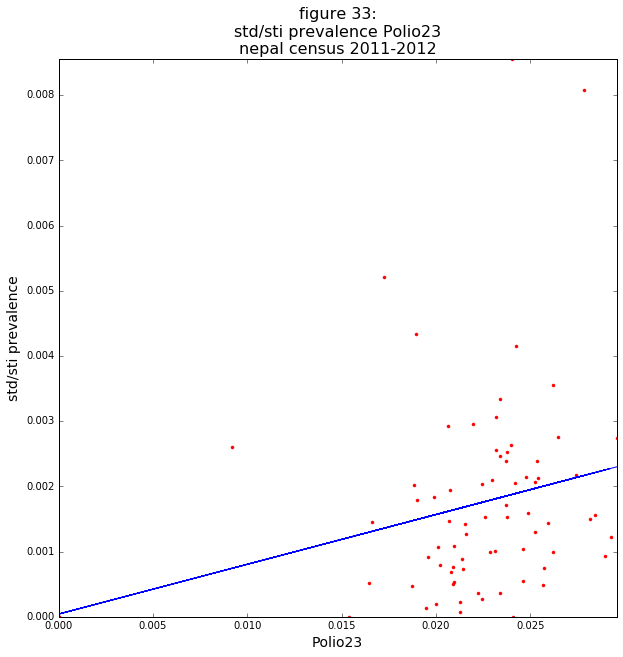

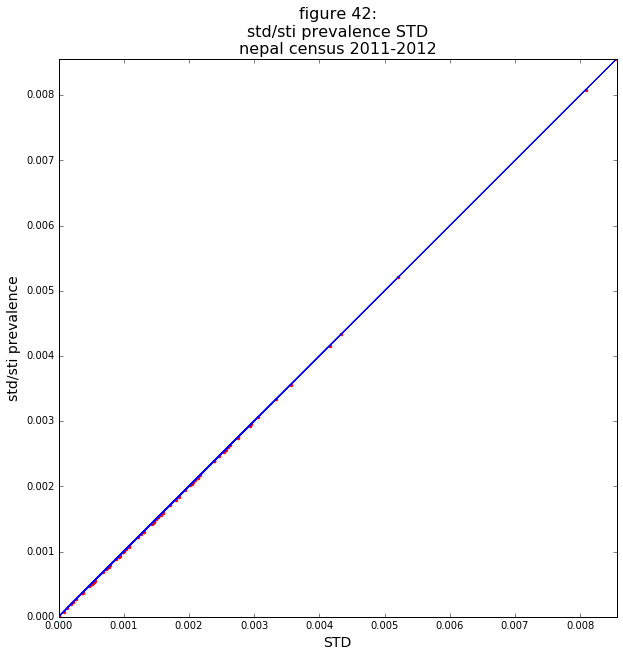

In [15]:
for i, elem in enumerate(sti.columns[1:]):
    results = sm.OLS(sti['STD'], sm.add_constant(sti[elem])).fit()
    if results.rsquared > .1:
        #print(results.summary())
        plt.figure(figsize=(10,10))
        plt.plot(sti[elem], sti['STD'], 'r.')
        plt.plot(sti[elem], results.predict(sm.add_constant(sti[elem])), '-')
        plt.title('figure ' + str(i) + ':\nstd/sti prevalence ' + elem + '\nnepal census 2011-2012', fontsize=16)
        plt.xlabel(elem, fontsize=14)
        plt.ylabel('std/sti prevalence', fontsize=14)
        plt.xlim(min(sti[elem]),max(sti[elem]))
        plt.ylim(min(sti['STD']),max(sti['STD']))

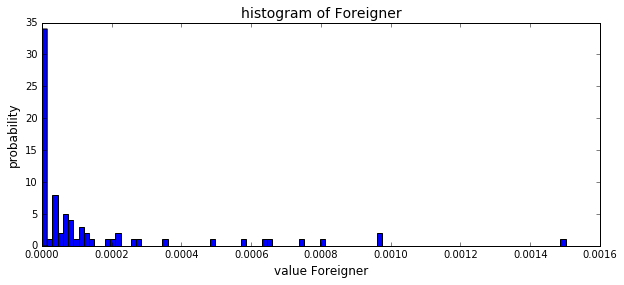

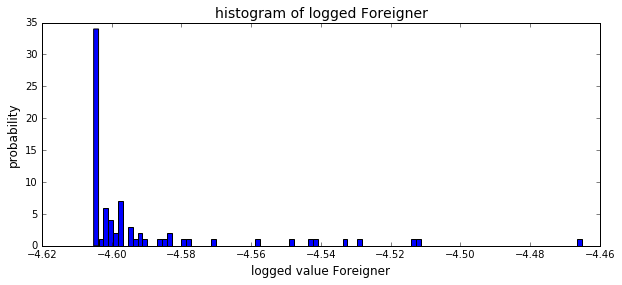

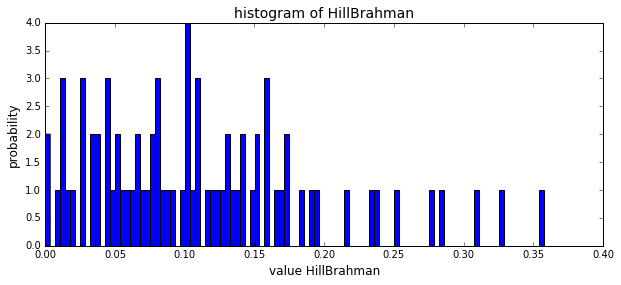

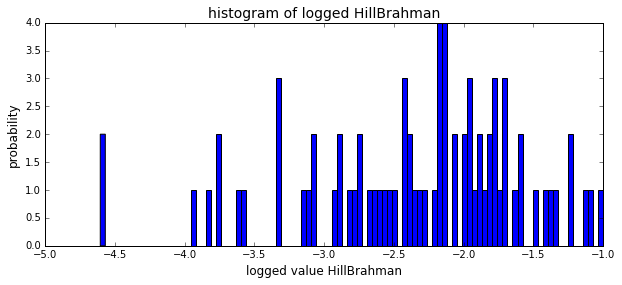

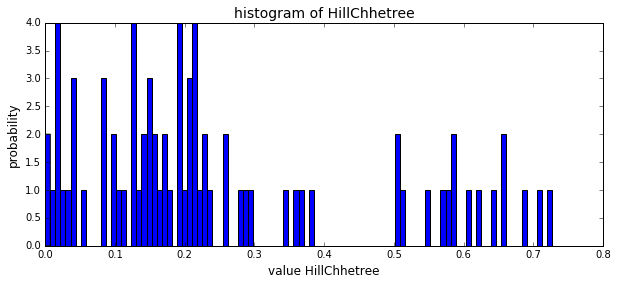

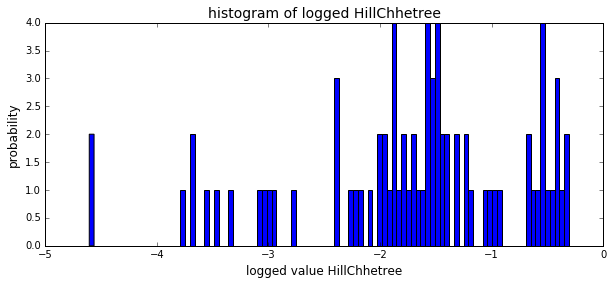

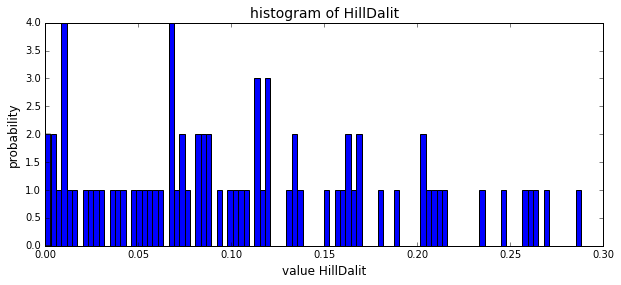

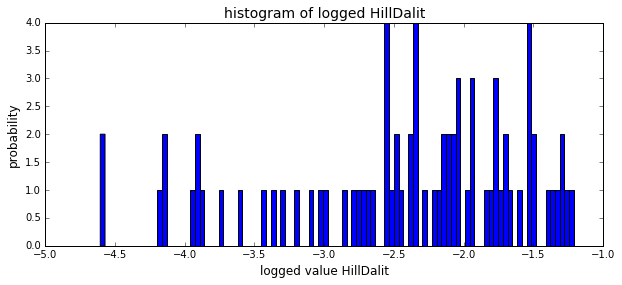

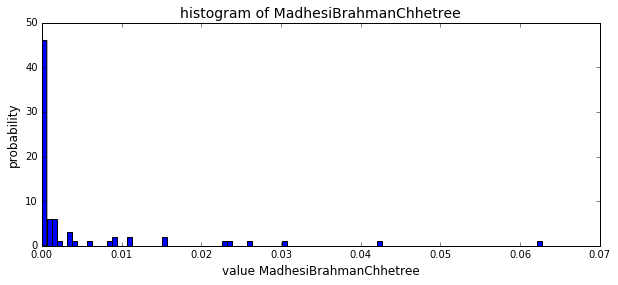

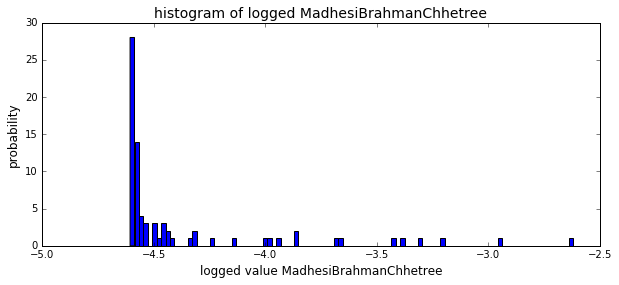

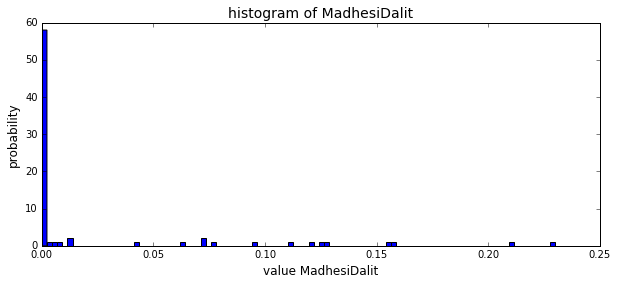

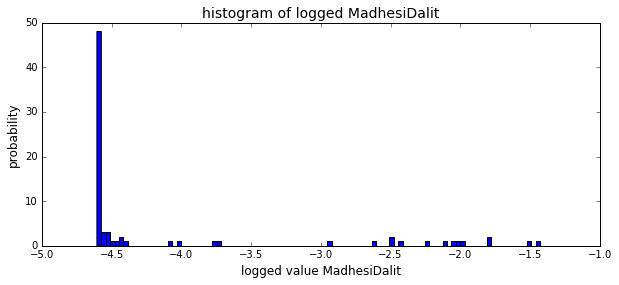

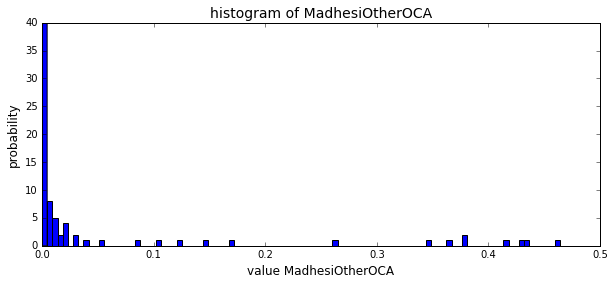

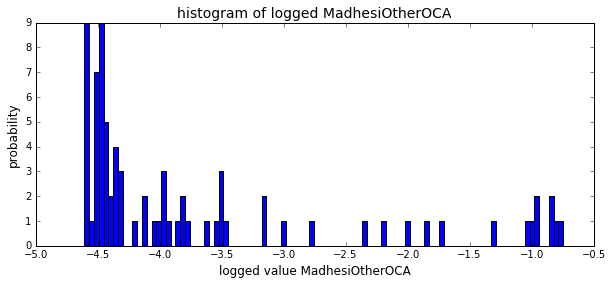

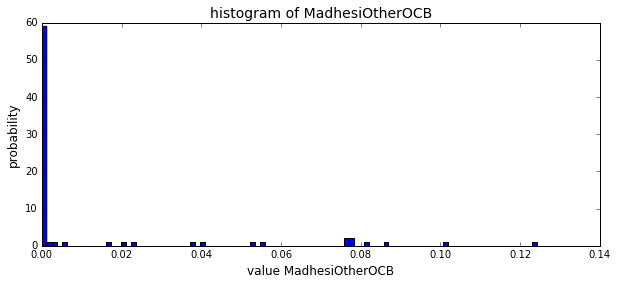

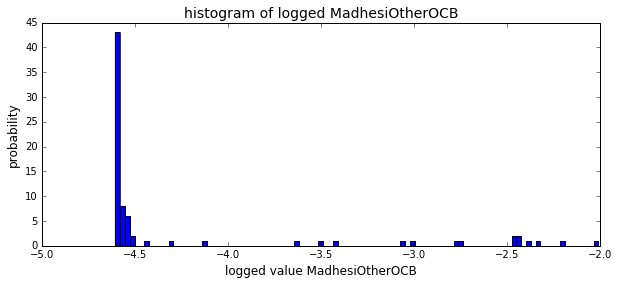

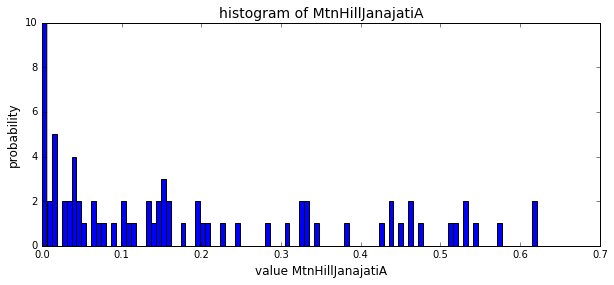

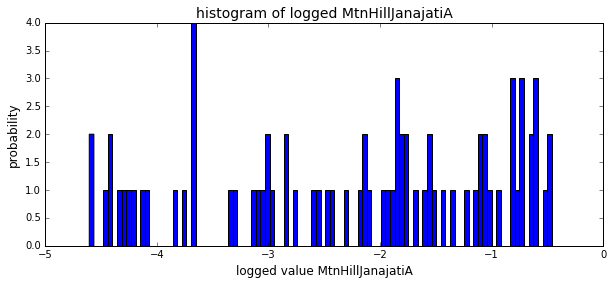

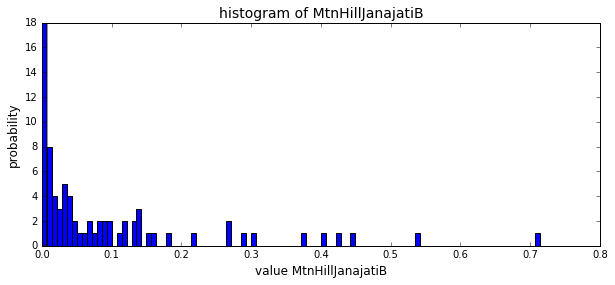

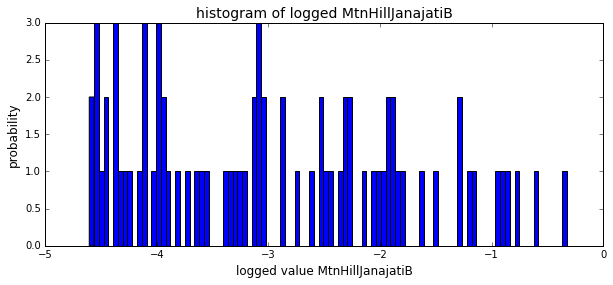

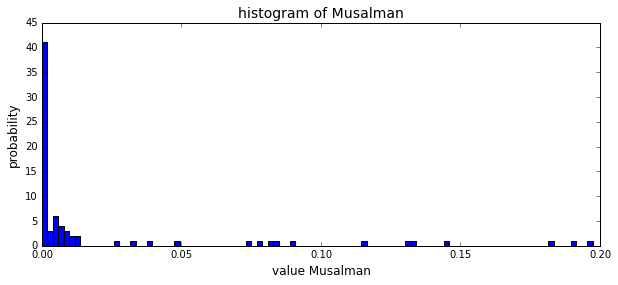

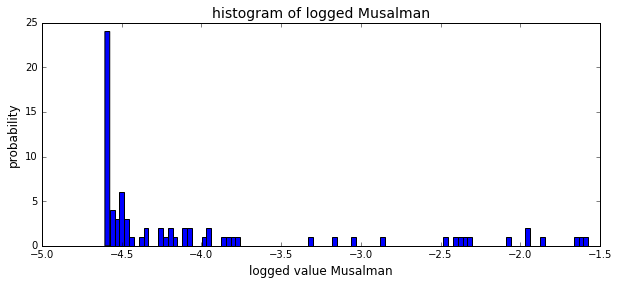

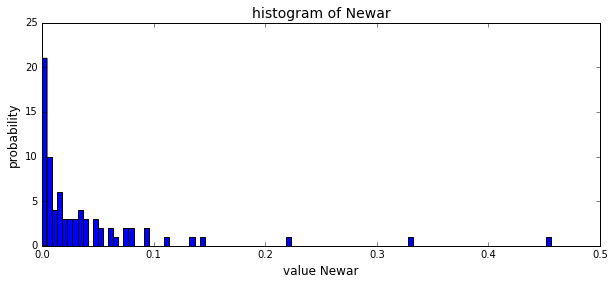

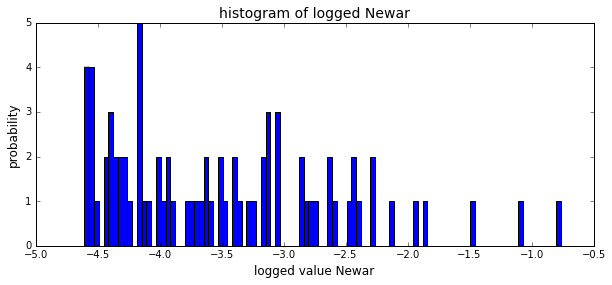

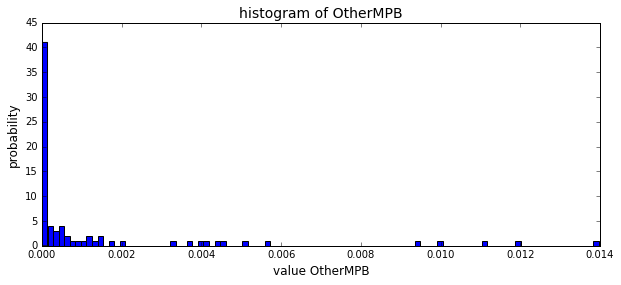

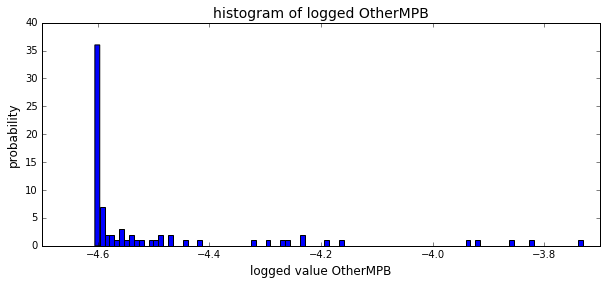

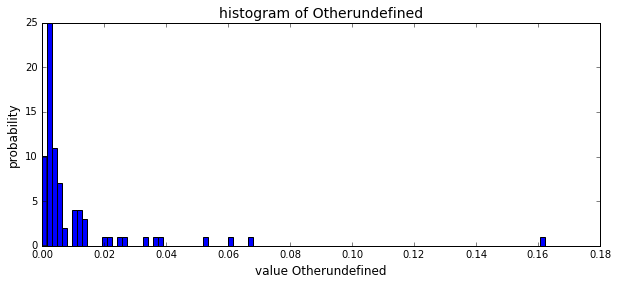

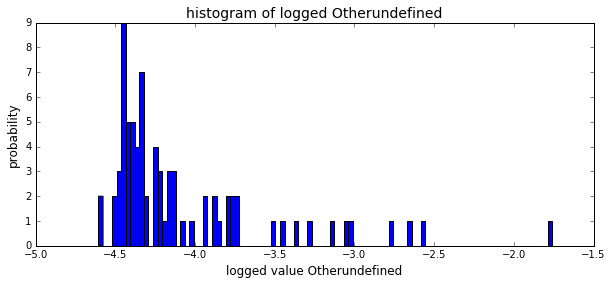

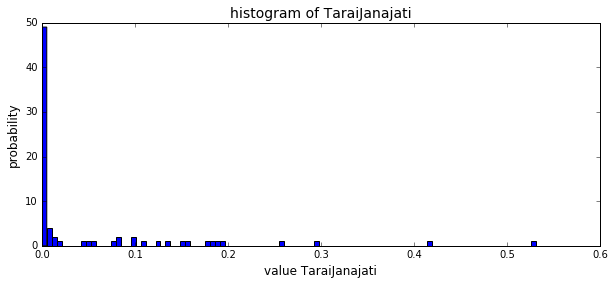

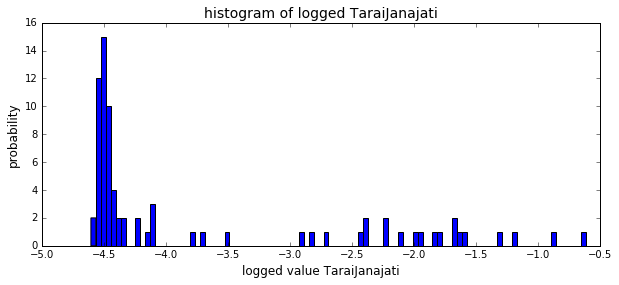

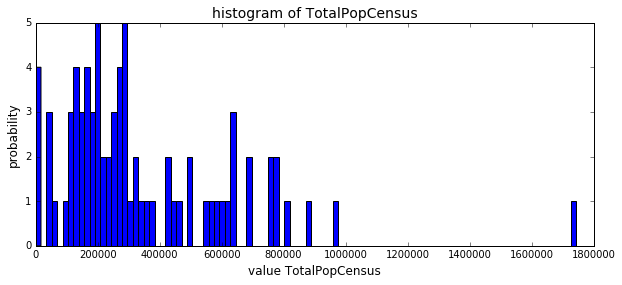

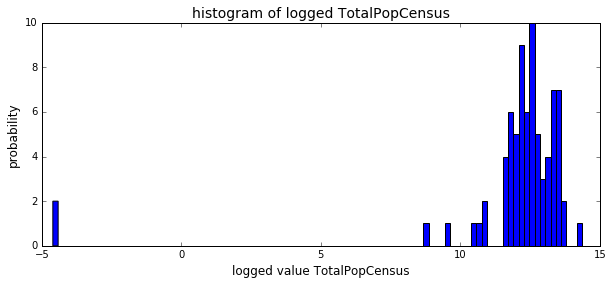

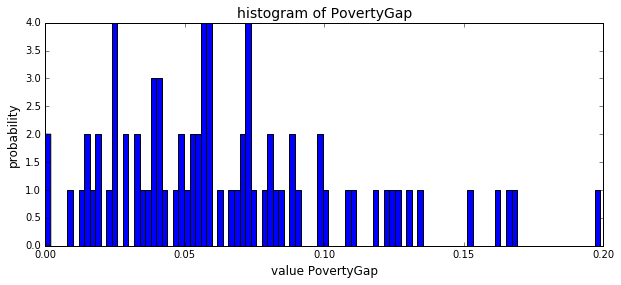

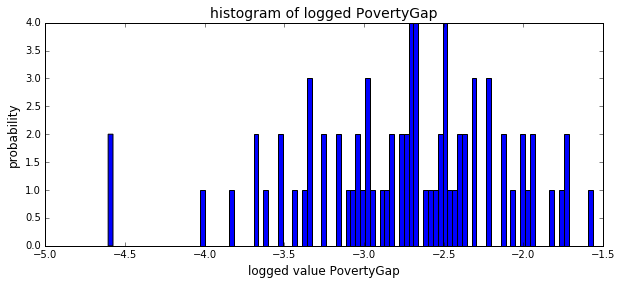

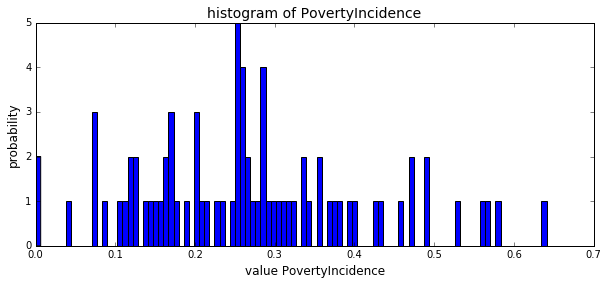

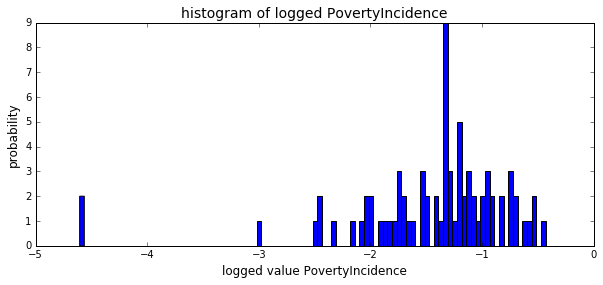

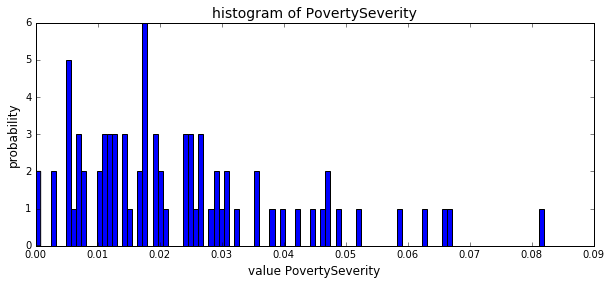

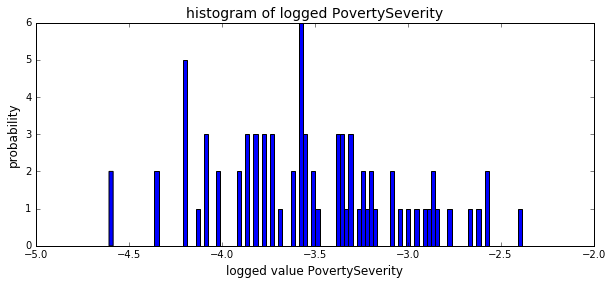

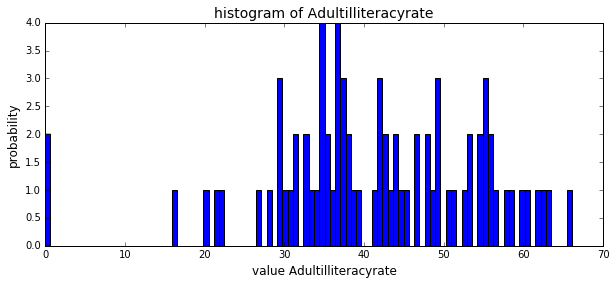

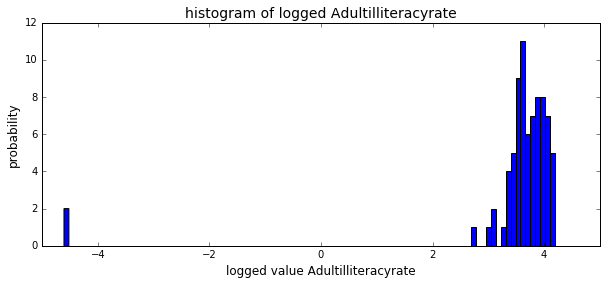

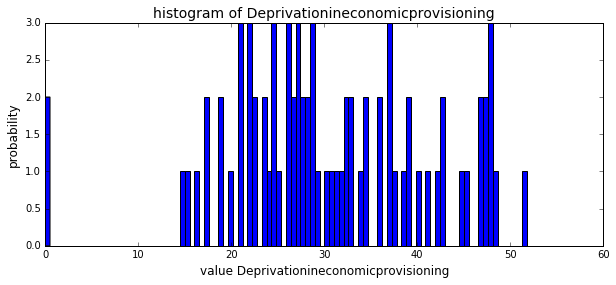

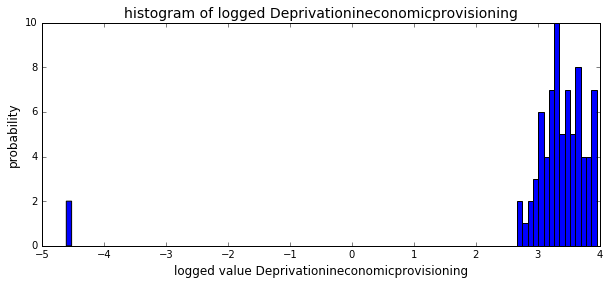

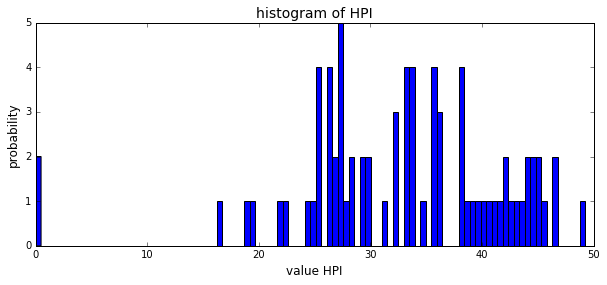

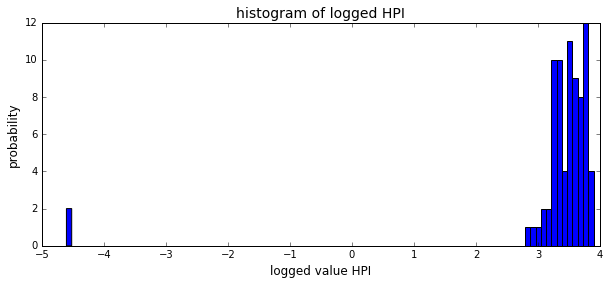

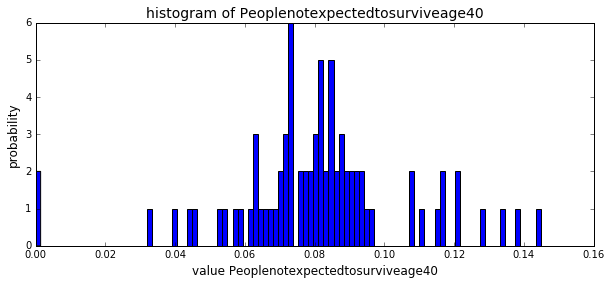

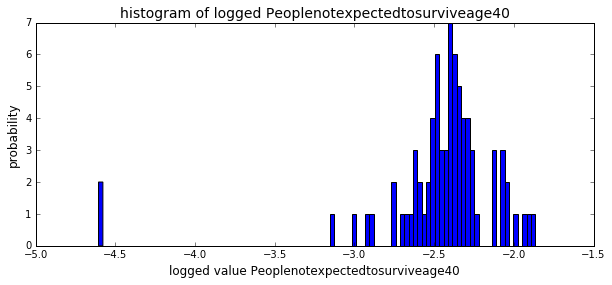

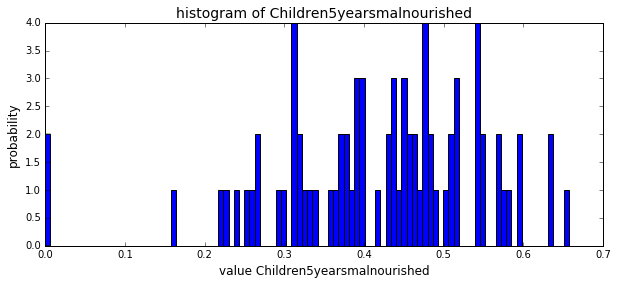

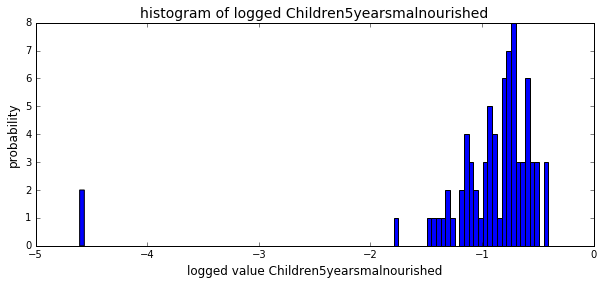

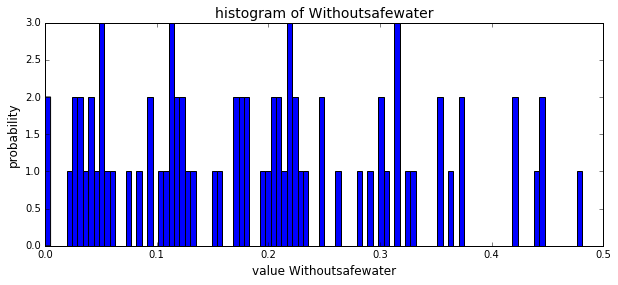

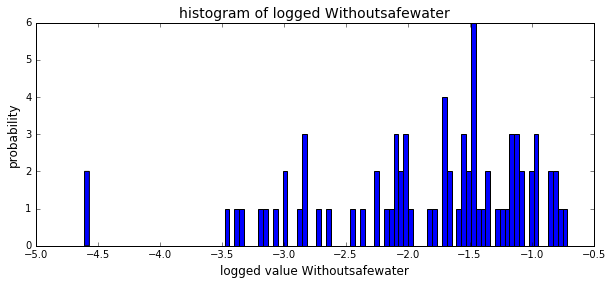

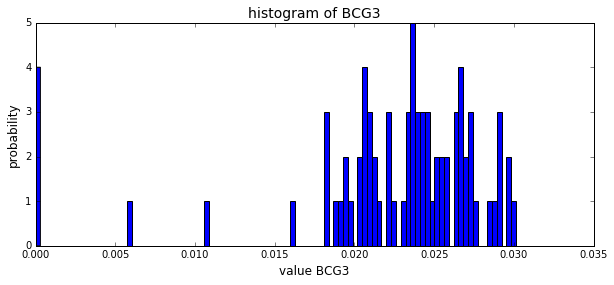

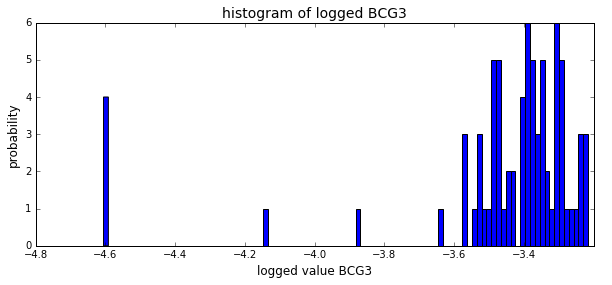

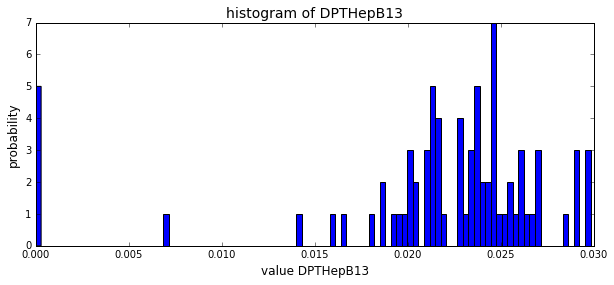

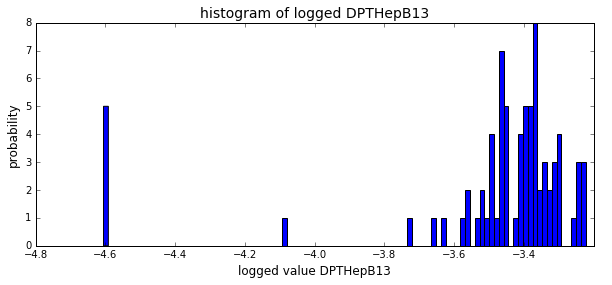

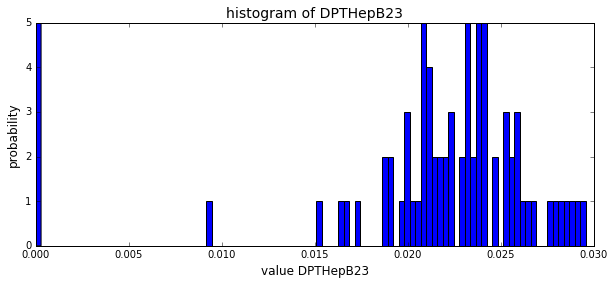

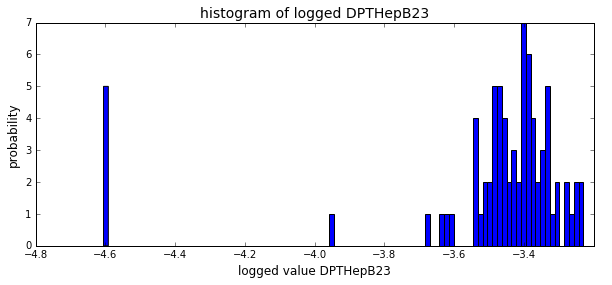

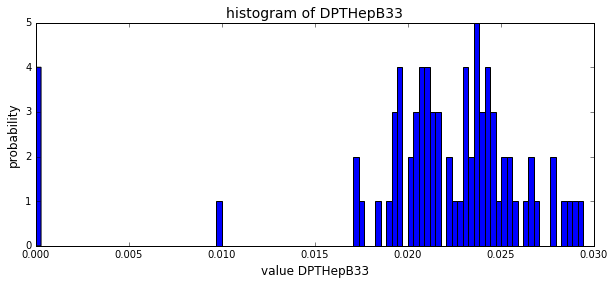

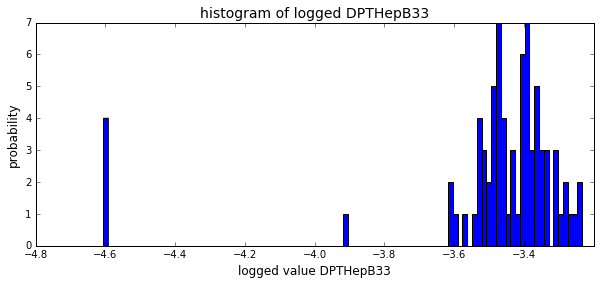

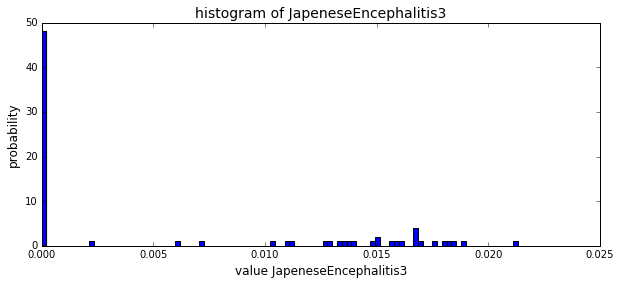

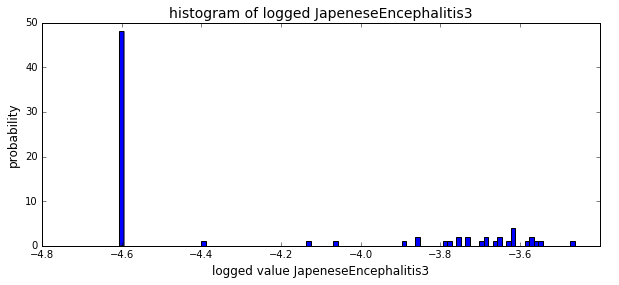

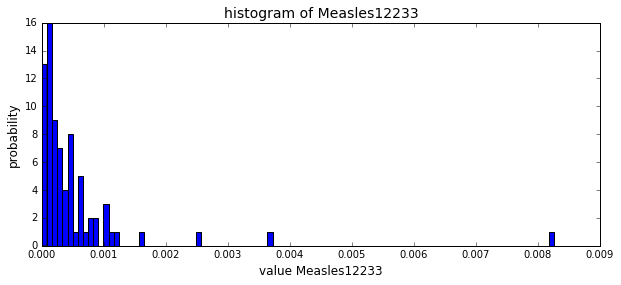

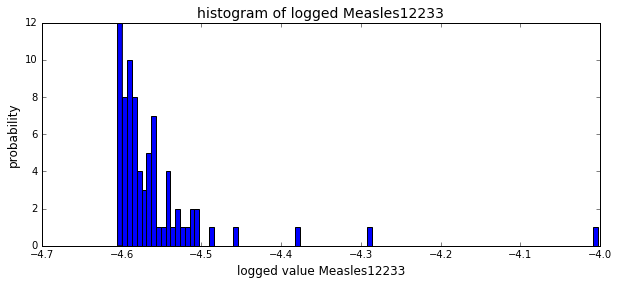

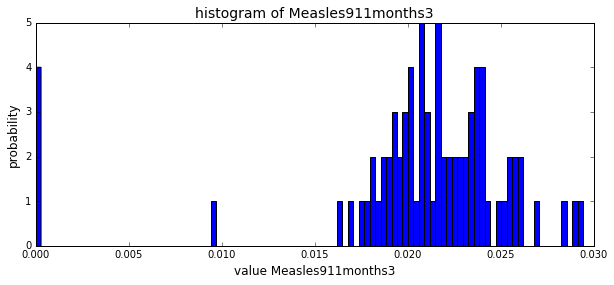

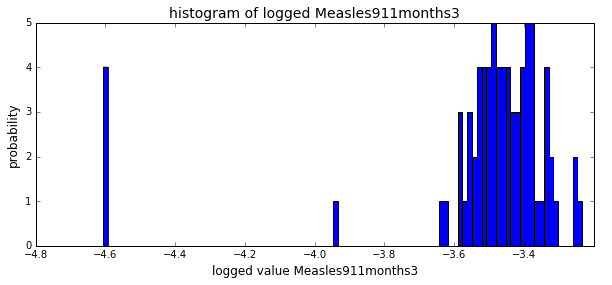

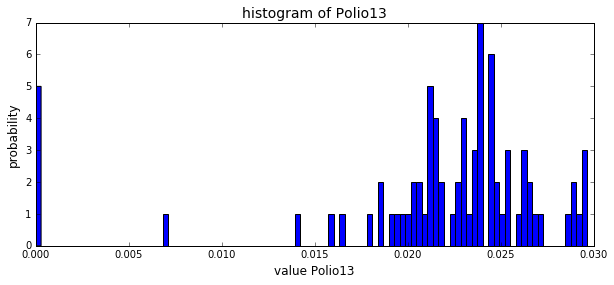

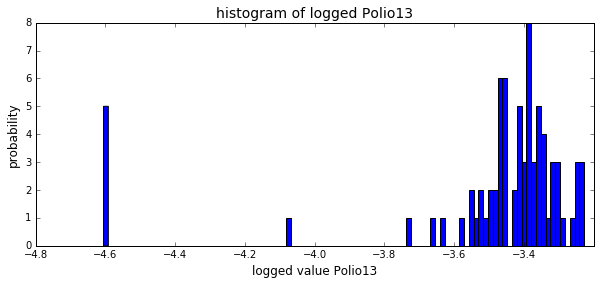

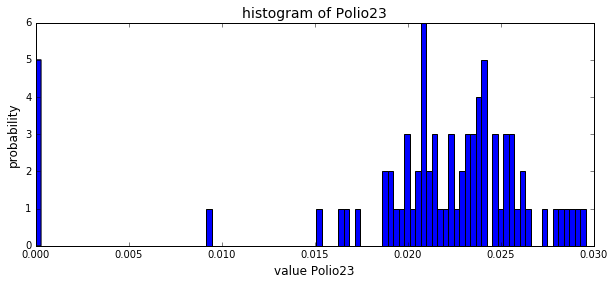

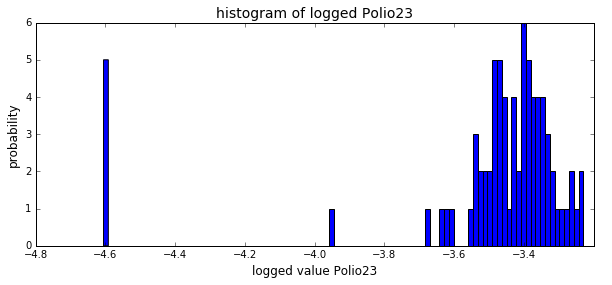

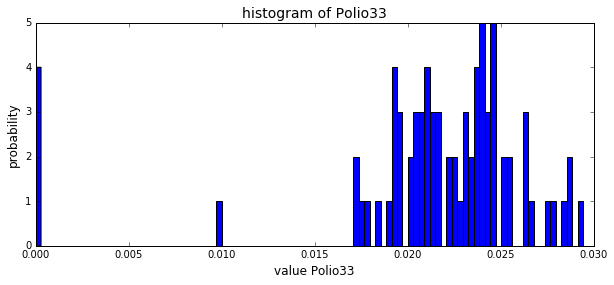

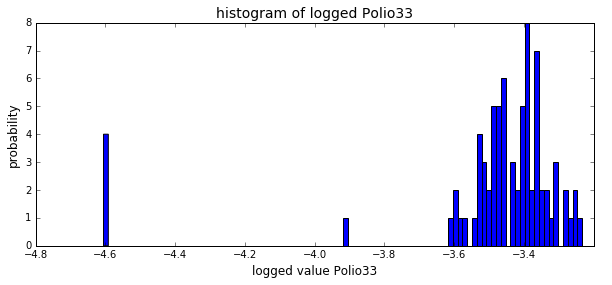

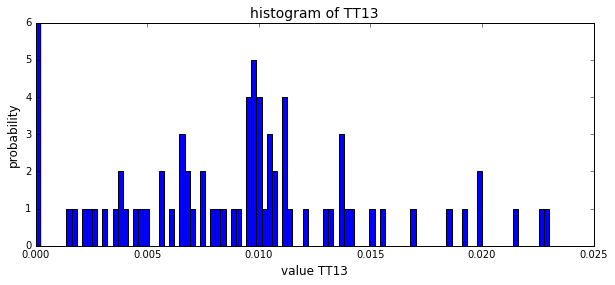

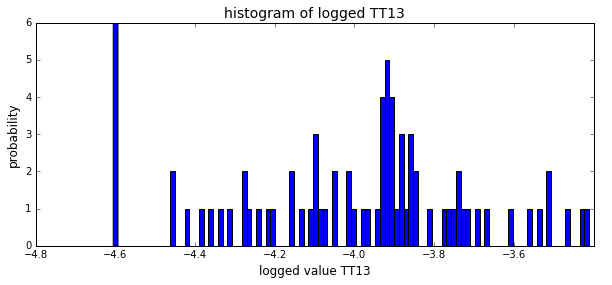

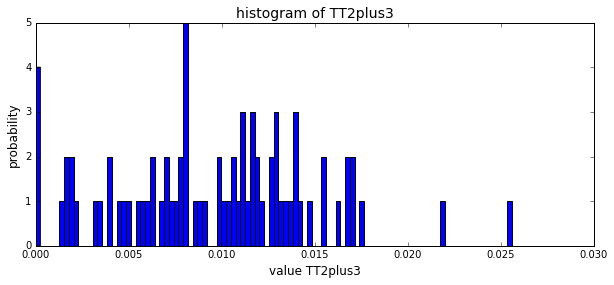

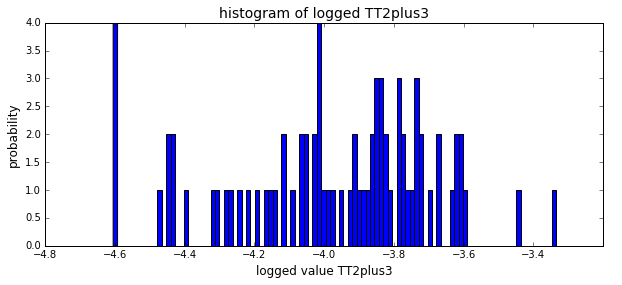

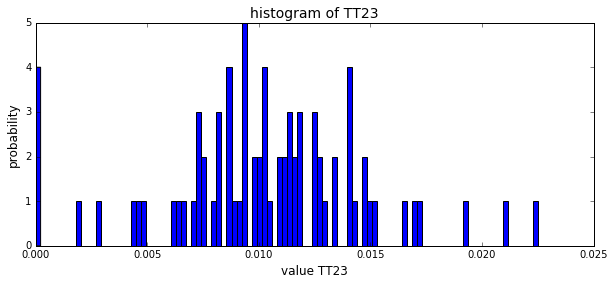

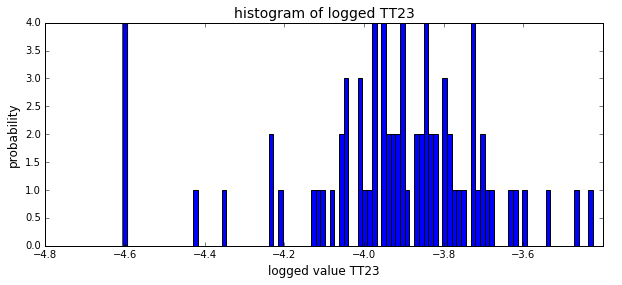

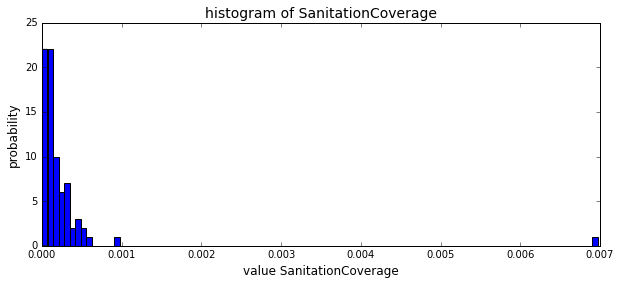

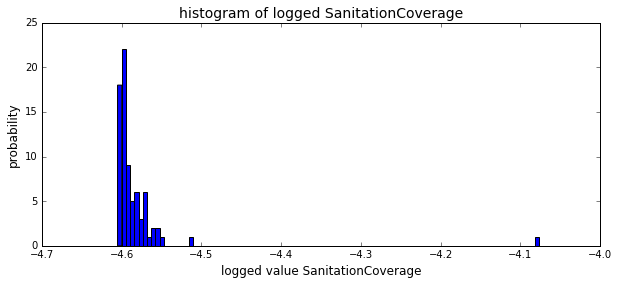

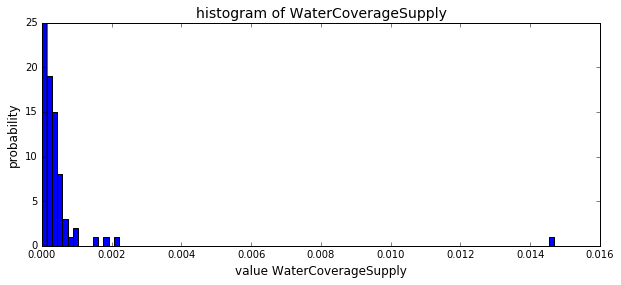

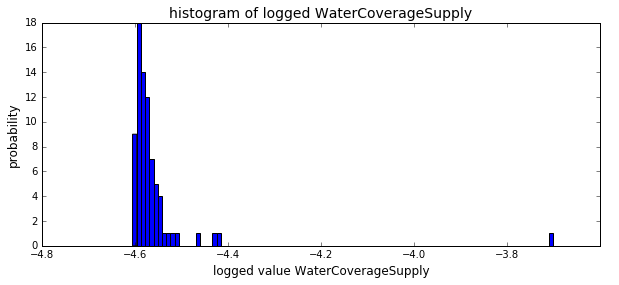

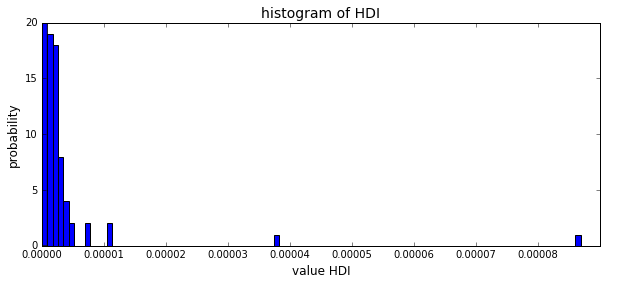

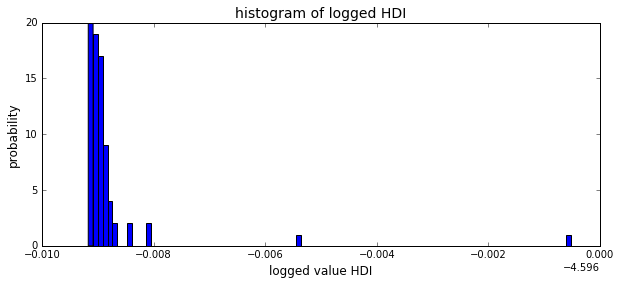

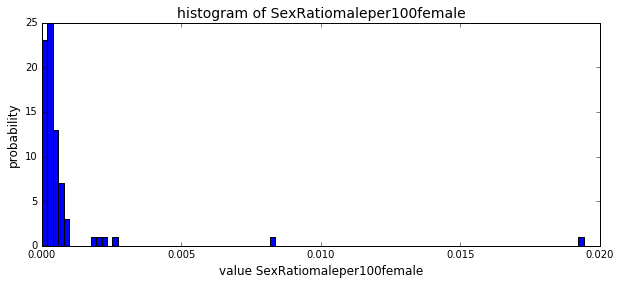

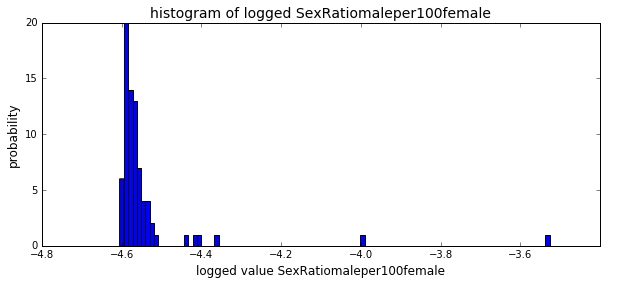

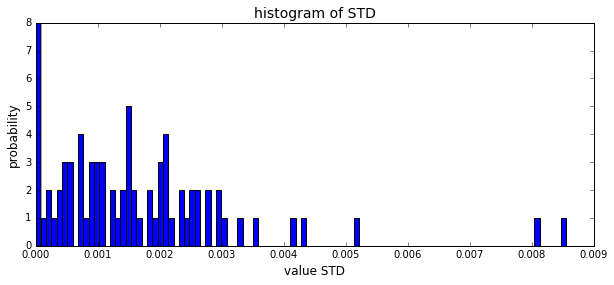

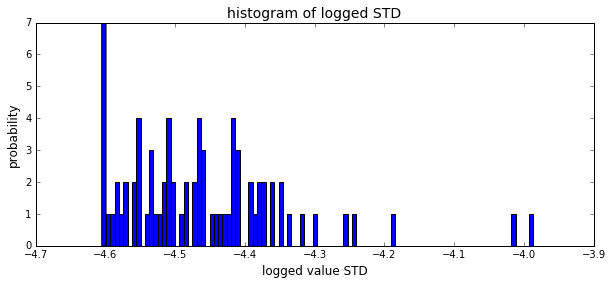

In [16]:
for i, elem in enumerate(sti.columns[1:]):  
    
    plt.figure(figsize=(10,4))
    plt.hist(sti[elem],bins=100)
    plt.xlabel('value ' + elem, fontsize=12)
    plt.ylabel('probability', fontsize=12)
    plt.title('histogram of ' + elem, fontsize=14)
    plt.show()
    
    plt.figure(figsize=(10,4))
    plt.hist(np.log(sti[elem]+.01),bins=100)
    plt.xlabel('logged value ' + elem, fontsize=12)
    plt.ylabel('probability', fontsize=12)
    plt.title('histogram of logged ' + elem, fontsize=14)
    plt.show()

In [39]:
for elem in sti.iloc[:,1:]:
    print ('Outliers for ' + elem, [elem for elem in sti[np.abs(sti[elem]-sti[elem].mean())>(3*sti[elem].std())]['District']])

('Outliers for Foreigner', ['Kathmandu', 'Lalitpur'])
('Outliers for HillBrahman', ['Parbat'])
('Outliers for HillChhetree', [])
('Outliers for HillDalit', [])
('Outliers for MadhesiBrahmanChhetree', ['Dhanusa', 'Mahottari'])
('Outliers for MadhesiDalit', ['Saptari', 'Siraha'])
('Outliers for MadhesiOtherOCA', ['Sarlahi', 'Siraha'])
('Outliers for MadhesiOtherOCB', ['Dhanusa', 'Rupandehi'])
('Outliers for MtnHillJanajatiA', [])
('Outliers for MtnHillJanajatiB', ['Makwanpur', 'Rasuwa'])
('Outliers for Musalman', ['Banke', 'Kapilbastu', 'Rautahat'])
('Outliers for Newar', ['Bhaktapur', 'Lalitpur'])
('Outliers for OtherMPB', ['Jhapa', 'Morang', 'Parsa'])
('Outliers for Otherundefined', ['Achham'])
('Outliers for TaraiJanajati', ['Bardiya', 'Kailali'])
('Outliers for TotalPopCensus', ['Kathmandu'])
('Outliers for PovertyGap', ['Bajura'])
('Outliers for PovertyIncidence', [])
('Outliers for PovertySeverity', ['Bajura'])
('Outliers for Adultilliteracyrate', ['Darchula', 'Kavrepalanchok'])
('

In [23]:
linear = LinearRegression()
X = sti.iloc[:,1:-1] 
y = sti.iloc[:, -1]
ins = []
os = []
for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    linear.fit(X_train, y_train)
    #y_pred = linear.predict(y_test)
    ins.append(linear.score(X_train, y_train))
    os.append(linear.score(X_test, y_test))
print mean(os)
print mean(ins)

/Users/kristikorsberg/devel/venv/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


-9.99104149398
0.951375256381


In [24]:
linear = LinearRegression()
linear.fit(X, y)
print linear.score(X, y)

0.646229052726


In [25]:
coefs = pd.DataFrame()
coefs['Feature'] = sti.columns[1:-1]
coefs['Coefficient Values'] = linear.coef_

In [26]:
coefs.sort_values(by='Coefficient Values',ascending=False)

,Feature,Coefficient Values
41,SexRatiomaleper100female,1.122394e+01
38,SanitationCoverage,2.367063e+00
32,Polio13,1.405604e+00
34,Polio33,1.052308e+00
23,Children5yearsmalnourished,1.003510e+00
24,Withoutsafewater,9.989622e-01
18,PovertySeverity,2.864070e-01
27,DPTHepB23,2.645242e-01
31,Measles911months3,2.405665e-01
25,BCG3,1.858667e-01


### try ridge and lasso regression

In [32]:
OS_linear_score = []
OS_ridge_score = []
OS_lasso_score = []
linear_coefs = []
ri_coefs = []
ls_coefs = []

#random state changes outcome tremendously
#can try to fit parameters, but sample size is small - thoughts?
#don't really trust lasso and ridge results because parameters haven't been tuned
for i in range(35,45):
    X_train, X_test, y_train, y_test = train_test_split(X,
                            y, test_size = 0.33, random_state =i)
    lm=LinearRegression()
    lm.fit(X_train,y_train)
    linear_coefs.append(lm.coef_)
    OS_linear_score.append(lm.score(X_test,y_test))
    
    ri=Ridge()
    ri.fit(X_train,y_train)
    ri_coefs.append(ri.coef_)
    OS_ridge_score.append(ri.score(X_test,y_test))
    
    ls=Lasso()
    ls.fit(X_train,y_train)
    ls_coefs.append(ls.coef_)
    OS_lasso_score.append(ls.score(X_test,y_test))
    
print np.mean(OS_linear_score)
print np.mean(OS_ridge_score)
print np.mean(OS_lasso_score)
variables = pd.DataFrame()
variables['var_names'] = [elem for elem in X.columns]
variables['linear'] = [elem for elem in np.mean(linear_coefs, axis=0)]
variables['ridge'] = [elem for elem in np.mean(ri_coefs, axis=0)]
variables['lasso'] = [elem for elem in np.mean(ls_coefs, axis=0)]

-53.0847129599
-0.0785229242422
-0.135466427809


In [37]:
variables.sort_values(by='linear',ascending=False)

,var_names,linear,ridge,lasso
38,SanitationCoverage,5.409812e+00,5.678588e-06,0.000000e+00
41,SexRatiomaleper100female,5.094391e+00,3.158711e-05,0.000000e+00
23,Children5yearsmalnourished,3.346021e+00,4.506244e-04,0.000000e+00
24,Withoutsafewater,3.340722e+00,-4.499598e-04,0.000000e+00
34,Polio33,1.414892e+00,5.657152e-05,0.000000e+00
26,DPTHepB13,5.278144e-01,4.967967e-05,0.000000e+00
33,Polio23,2.772335e-01,5.332771e-05,0.000000e+00
25,BCG3,2.066646e-01,5.066740e-05,0.000000e+00
31,Measles911months3,2.031623e-01,4.736181e-05,0.000000e+00
4,MadhesiBrahmanChhetree,1.037646e-01,1.256506e-05,0.000000e+00


### next steps:
1. figure out what's going on with the tt23 variable - there are two columns with the same name but different values
2. run model against all other illnesses. which one is the most accurate?
3. drop some columns - people not expected to reach age 40 isn't a predictor - could use as a dependent variable
4. discuss sample size
5. must reduce feature size - too many!